# Introduction 

## Soul Food
You might be familiar with the phrase "music is food for the soul." Regardless of language and culture, music can cheer us up, get us excited, or calm us down. Especially during the Covid-19 pandemic, music can be a form of therapy, something that helps us through this stituation of fear and anxiety. But how exactly? What kind of music do we look towards at a time like this? How do tastes in music change between lockdown and regular periods? 

## Setting Up
To investigate, we first picked the countries we wanted to analyze. 

These 5 countries were selected for high infection numbers:
* United States
* Spain
* Italy
* UK
* France

These 2 countries selected for case growth rate pattern (sudden spike from slow to fast)
* Switzerland
* Portugal

These 2 countries selected for low infection numbers:
* Vietnam
* Taiwan

We selected countries in these groups to analyze a variety of lockdown situations. The number of infections in a country may contribute to a higher sense of unease during lockdown periods which may be reflected in trends in audio feature data. Note that Taiwan did not impose lockdown orders to contain the virus. 

We then picked the dates to analyze. WHO website timeline cites 12/31/2019 as the date of the identification of the novel coronavirus. Most other regions are unaffected at this point. We will start with the week of 12/26/2019 to get a baseline of the type of music a region typically enjoys. We will look at each week from then up till 4/23/2020, the most recent week with released data at the time of data collection (4/30/2020). 

We took the 100 most listened to tracks for each week in each country and looked at the Spotify audio feature analysis for each song in order to determine underlying trends and correlations. 

## What Makes a Good Lockdown Playlist?

We found that during lockdown periods, people in general looked for music that was happier (high valence), had more energy, and was good for dancing (high danceability) than they normally did. There was also a slightly lower preference for acoustic songs during lockdown periods. This was found looking at the entire data set. The music preferences for individual countries varied slightly and will be further explored and explained below. 

# Data description

### What are the observations (rows) and the attributes (columns)?

The observations of this dataset show each of the top 100 most listened to songs in a given week for a region. Attributes for each song include the song title, artist, number of streams, URL, dates on the top 100 chart, and region. It also includes Spotify analysis for the song, which quantifies the song's danceability, energy, loudness, acousticness, instrumentalness, valence and liveness. The observations also each have an attribute which identifies whether or not there was a lockdown in the given region during the week that the song was on the top 100 charts. 


### Why was this dataset created?

The dataset was created to allow us to analyze the type of music that people are listening to during quarantine. We are curious to see if there are specific qualities that a song has that helps people get through these tough times. 


### Who funded the creation of the dataset?

The dataset was created combining information from SpotifyCharts.com, Spotify's API and COVID-19 lockdown data from Auravision and Johns Hopkins University. 


### What processes might have influenced what data was observed and recorded and what was not?

The data for COVID-19 lockdowns could have been affected by news reporting or ease of information access. Two sources were used to cross-check the lockdown dates for accuracy. In the case of inaccuracy, there had to be more research to find lockdown dates. In some cases this was difficult because there was not extensive news coverage for areas like Vietnam.

Additionally, we were limited in the countries we were able to analyze based on which countries had Spotify Top 100 charts available. For example, Spotify did not have any song charts for China, which, as original the epicenter of the COVID-19 pandemic, may have been an interesting country to analyze. However, due to the Spotify data not being available in this country, we were unable to include it in our analysis.


### What preprocessing was done, and how did the data come to be in the form that you are using?

The top songs were downloaded as CSVs of the top 200 songs for a region by month. The 100 top songs were selected from there and all of the songs of a given region were then combined into a single DataFrame. For each song in the DataFrame, we searched for the audio feature analysis scores using the Spotify API. We then extracted the audio feature values and stored them in a dictionary for each song. From there, we combined the song attribute values with the existing DataFrame of top 100 songs for each country. Next, we collected COVID-19 lockdown data from several CSVs found online. The relevant data was extraced from these files. Finally, we compiled all collected data of songs, song attributes, regions, and region lockdown information into `master_frame.csv`. All of our code can be found in the file titled `Data Processing Code.csv` in our repository. 


### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

People are involved in the collection of Spotify's top 200 charts because this is a ranking of the songs that are most listened to in a given week. Therefore, Spotify users in each region are involved in the data collection. However, Spotify does not make their collection of this data very well known, so the subjects probably were not aware. 

### Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 

All our data can be found at our [repository](https://github.coecis.cornell.edu/esj25/2950-final-project). Our analysis ready data is in `master_frame.csv`, music chart data from spotify and data after steps of processing are in the folder tited `data`.

### Potential Problems with Our Dataset
- Since lockdowns are by state/province, we mark a region as under lockdown so long as one state/province within the entire region is still under lockdown. This may lead to some inaccuracies in our analysis in a large country such as the United States, where the lockdown status of an epicenter like New York City may not be reflective of the status of the entire nation. However, because Spotify song data is only available by country and not smaller provinces, we had to make these assumptions and aggregate the COVID-19 data in terms of countries to match how the Spotify data was collected.
- Spotify charts of top songs are collected on a weekly basis; however, some countries' lockdowns started in the middle of the week. Therefore, there may be slight inconsistencies in our data.
- Spotify top song chart data may be a more accurate reflection of true music tastes and trends in countries that have a larger proportion of Spotify users. For example, in a country like the United States with a greater number of Spotify listeners than Vietnam, the song charts may be a more accurate reflection of true song trends than the song charts of Vietnam.

# Data Analysis

## Pre-analysis Notes
Here are the audio features we are analyzing as well as a description of what they measure. [(Spotify)](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)

- Danceability
> How suitable a track is for dancing based on musical elements including tempo, rhythm stability, beat strength, and overall regularity. 0.0 is least danceable and 1.0 is most danceable
- Energy
> Represent a perceptual measure of intensity and activity. High energy tracks (1.0) feel fast, loud and noisy. (Ex: death metal) Classical music would be a good representation of something that scores low on the energy scale (0.0). 
- Acousticness
> Confidence measure from 0.0 to 1.0 of whether track is acoustic
- Instrumentalness
> Predicts whether a track contains words. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. 
- Liveness
> Detects presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides stronge likelihood that the track is live.
- Valence
> A measure from 0.0 to 1.0 describing musical positiveness conveyed by a track. Tracks with high valence sound more positive (eg. happy, cheerful, euphoric), while racks with low valence sound more negative (eg. sad, depressend, angry)

Note that we do not include the following features in our analysis:
- Tempo: Not on same scale as other features. Also, tempo values are used in calculation of danceability.
- Loudness: Values accounted for in measure of energy. The energy audio feature can be viewed as nearly synonymous as loudness.

In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Analysis of Complete Data Set

We begin our analysis by calculating relevant summary statistics and developing models using the data from all countries in our dataset.

In [3]:
data = pandas.read_csv("master_frame.csv")

### Looking at data distributions to determine use of mean or median

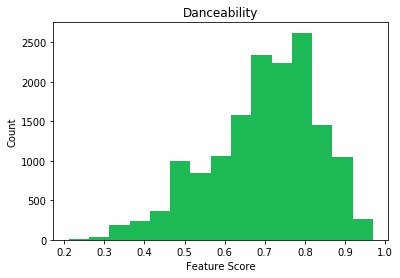

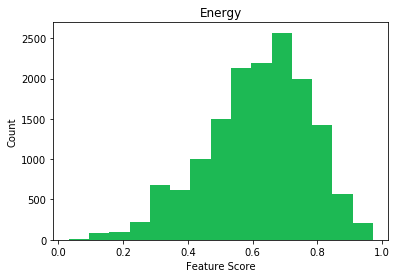

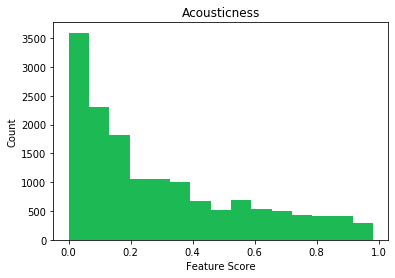

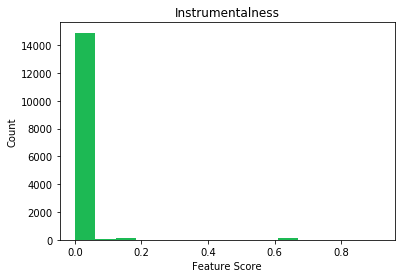

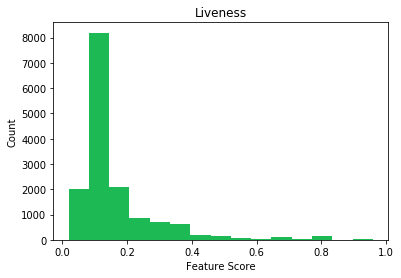

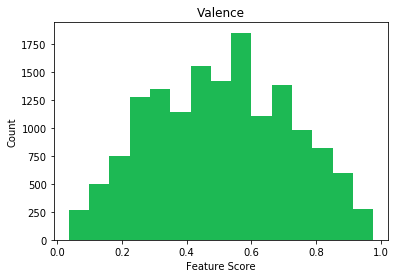

In [4]:
features = ["Danceability","Energy","Acousticness","Instrumentalness","Liveness","Valence"]

for feature in features:
    plt.hist(data[feature],bins=15,color="#1DB954")
    plt.xlabel("Feature Score")
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

When data is skewed, the median is a more reliable measure of central tendency because it is less susceptible to be affected by outliers and extreme values than the mean is. We can see from the graphs above that the distribution for all the audio features, except valence, is skewed. When the distribution in symmetric, mean and median will be very close and are therefore both reliable measures of central tendency. Because of this, we will use median as our overall measure of central tendency.

### Data Summary Through Averages and Side by Side Visual Comparison

In [5]:
# Seperate lockdown periods from non lockdown periods
no_lockdown = data.loc[data['Current Lockdown'] == "No"]
yes_lockdown = data.loc[data['Current Lockdown'] == "Yes"]

for feature in features:
    #find mean and median for both time periods
    no_lockdown_mean = no_lockdown[feature].mean()
    no_lockdown_median = no_lockdown[feature].median()
    yes_lockdown_mean = yes_lockdown[feature].mean()
    yes_lockdown_median = yes_lockdown[feature].median()
    print(feature)
    print("No Lockdown Mean:",no_lockdown_mean)
    print("Yes Lockdown Mean:",yes_lockdown_mean)
    print("No Lockdown Median:",no_lockdown_median)
    print("Yes Lockdown Median:",yes_lockdown_median)
    print("\n")

Danceability
No Lockdown Mean: 0.6919358333333343
Yes Lockdown Mean: 0.7130419999999984
No Lockdown Median: 0.7070000000000001
Yes Lockdown Median: 0.731


Energy
No Lockdown Mean: 0.6082452592592584
Yes Lockdown Mean: 0.6352631111111079
No Lockdown Median: 0.626
Yes Lockdown Median: 0.653


Acousticness
No Lockdown Mean: 0.3012920291342601
Yes Lockdown Mean: 0.2615438702222233
No Lockdown Median: 0.208
Yes Lockdown Median: 0.1735


Instrumentalness
No Lockdown Mean: 0.010196081867592733
Yes Lockdown Mean: 0.008956357800000009
No Lockdown Median: 0.0
Yes Lockdown Median: 0.0


Liveness
No Lockdown Mean: 0.16015100000000262
Yes Lockdown Mean: 0.16604906666666686
No Lockdown Median: 0.112
Yes Lockdown Median: 0.114


Valence
No Lockdown Mean: 0.4971875648148025
Yes Lockdown Mean: 0.528903555555555
No Lockdown Median: 0.498
Yes Lockdown Median: 0.54




**Danceability** median was 0.024 higher during lockdown periods. After all, dance parties are a great way to pass time indoors!

**Energy** was also higher during lockdown periods. Energy measure during lockdown was 0.027 higher compared to non-lockdown periods.

**Acousticness** median was 0.0355 lower during lockdown periods. 

**Instrumentalness** is already low during regular, no lockdown periods. However, during lockdown the instrumentalness score dropped further by 0.0811. Songs with lower instrumentalness scores are more likely to contain voices. Perhaps listeners may be more inclined to listen to music with voices as a substitute for face-to-face human conversation.
*note: We use mean values here because median values are 0 and do not provide sufficient information for comparison*

**Liveness** median stayed virtually the same. There was a small increase of 0.002 during lockdown periods.

**Valence** median increased by 0.043 during lockdown periods, suggesting that people preferred happier songs to lift their spirits during quarantine. 

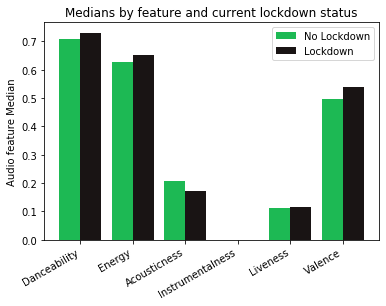

In [6]:
lockdown_medians =[]
no_lockdown_medians =[]

#append medians for audio feaure in lockdown period and no lockdown period to respective lists
for feature in features:
    no_lockdown_medians.append(no_lockdown[feature].median())
    lockdown_medians.append(yes_lockdown[feature].median())

# length of graph equal to number of features
x=numpy.arange(len(features))
#width length of bar
width = 0.4

#written while referencing matplotlib example
fig, ax=plt.subplots()
r1 = ax.bar(x-width/2,no_lockdown_medians,width,label="No Lockdown",color="#1DB954")
r1 = ax.bar(x+width/2,lockdown_medians,width,label="Lockdown",color="#191414")

ax.set_ylabel('Audio feature Median')
ax.set_title('Medians by feature and current lockdown status')
ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

### Determining Linear Regression Model

In [7]:
# Convert categorical variables of "Yes" or "No" in "Current Lockdown" column to indicator variables
lockdown_dummies = pandas.get_dummies(data["Current Lockdown"])
lockdown_dummies.head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [8]:
for feature in features:
    print(feature)
    model = LinearRegression().fit(lockdown_dummies[["Yes"]], data[feature] )
    slope = model.coef_[0]
    slope = str(slope)
    print("Lockdown Slope of Regression: " + slope)
    print()

Danceability
Lockdown Slope of Regression: 0.021106166666666693

Energy
Lockdown Slope of Regression: 0.027017851851851894

Acousticness
Lockdown Slope of Regression: -0.03974815891203713

Instrumentalness
Lockdown Slope of Regression: -0.0012397240675925823

Liveness
Lockdown Slope of Regression: 0.005898066666666671

Valence
Lockdown Slope of Regression: 0.0317159907407408



The above slope of regression values suggest that there is a positive correlation, though relatively weak, between the presence of a lockdown and a higher value for `Danceability`, `Energy`, `Liveness`, and `Valence` in songs. On the other hand, there appears to be a negative correlation between the presence of a lockdown and a higher value for `Acousticness` and `Instrumentalness`.

### Checking Results Against Randomness

We compare the actual slope of regression values with permuted values for y (feature values) to see if the regression slope we observed could have been due to random chance.

In [9]:
def permuted_feature_values(feature):
    return numpy.random.permutation(data[feature].copy())

Danceability
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Danceability


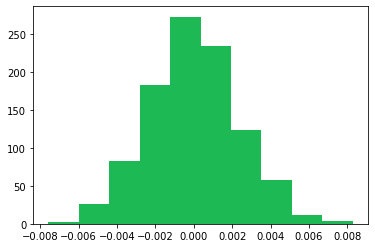

Energy
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Energy


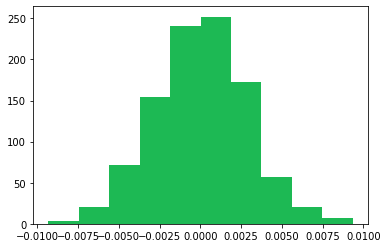

Acousticness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Acousticness


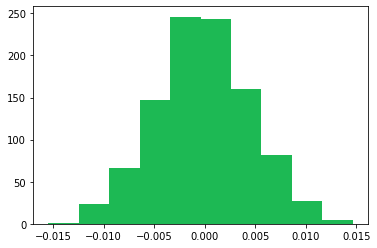

Instrumentalness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Instrumentalness


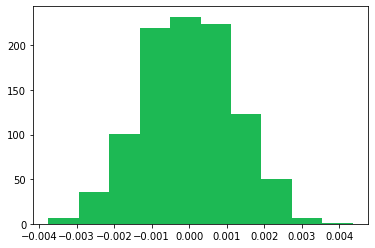

Liveness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Liveness


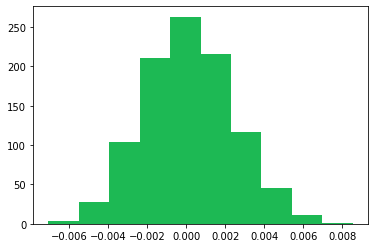

Valence
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Valence


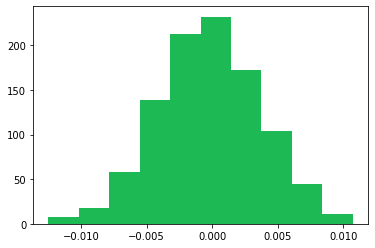

In [10]:
for feature in features:
    print(feature)
    print("Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of ", feature)
    slopes_array = []
    
    for y in range(0, 1000):  # Creating 1000 permutations of each feature values
        permuted_values = permuted_feature_values(feature)
        
        # Fit given permutation of feature value against presence of a lockdown
        model = LinearRegression().fit(lockdown_dummies[["Yes"]], permuted_values) # Fit against YES lockdown
        slope = model.coef_[0]
        slopes_array.append(slope)

    plt.hist(slopes_array,color="#1DB954")
    plt.show()

**Danceability:** The slope of regression value calculated for real values of danceability given that there was a lockdown was 0.021106. However, the above histogram demonstrates that slopes between elements of the vector X (Presence of a Lockdown) and permutations of vector Y (danceability values) average around 0.0, implying no significant linear relationship. Additionally, the extreme slopes in our analysis using simple randomness seem to not exceed 0.008. Therefore, our actual slope of regression value seems to be not due to random chance, and in fact **suggests a positive correlation** between danceability and the presence of a lockdown.

**Energy:** The slope of regression value calculated for real values of energy given that there was a lockdown was 0.0270. Similar to danceability, the above histogram for energy demonstrates that slopes between elements of the vector X (Presence of a Lockdown) and permutations of vector Y (energy values) average around 0.0 with extreme slopes not exceeding 0.01. Therefore, this may suggest that our actual slope of regression value seems to be not due to random chance, and in fact **suggests a positive correlation** between energy and the presence of a lockdown.

**Acousticness:** The slope of regression value calculated for real values of acousticness given that there was a lockdown was -0.0397. Similar to above, the histogram for acousticness demonstrates that slopes between elements of the vector X (Presence of a Lockdown) and permutations of vector Y (acousticness values) average around 0.0 with extreme slopes not below -0.015. Therefore, this may suggest that our actual slope of regression value seems to be not due to random chance, and in fact **indicates a negative correlation** between acousticness and the presence of a lockdown.

**Instrumentalness:** The slope of regression value calculated for real values of instrumentalness given that there was a lockdown was -0.00124. Similar to above, the histogram for instrumentalness demonstrates that slopes between elements of the vector X (Presence of a Lockdown) and permutations of vector Y (instrumentalness values) average around 0.0. However, our actual slope of regression value lies well within the range of this histogram generated using randomness. Therefore, the actual slope of regression value for instrumentalness may in fact be due to random chance, and **may not indicate a real negative correlation** with the presence of a lockdown.

**Liveness:** The slope of regression value calculated for real values of liveness given that there was a lockdown was 0.0059. Our actual slope of regression value for liveness is within the range of the histogram demonstrated above that was generated with randomness. However, it lies as an extreme value in this histogram. Therefore, **further research may be necessary** to determine if this actual slope of regression was due to random chance, or is indicative of a real positive correlation between liveness and the presence of a lockdown.

**Valence:** The slope of regression value calculated for real values of valence given that there was a lockdown was 0.0317. Similar to above, the histogram for valence demonstrates that slopes between elements of the vector X (Presence of a Lockdown) and permutations of vector Y (valence values) average around 0.0 with extreme slopes not exceeding 0.015. Therefore, this may suggest that our actual slope of regression value seems to be not due to random chance, and in fact **indicates a positive correlation** between valence and the presence of a lockdown.

## Analysis of Individual Countries

Next, we perform similar analysis to the individual countries in our dataset.

### Creating Functions

In [11]:
# Calculate mean and median values of song features for lockdown and no lockdown periods

def lockdown_status_avg(country):
    features = ["Danceability","Energy","Acousticness","Instrumentalness","Liveness","Valence"]
    
    # Access given country's rows in master dataframe
    country_df=data.loc[data["Region"] == country]
    
    no_lockdown = country_df.loc[data['Current Lockdown'] == "No"]
    yes_lockdown = country_df.loc[data['Current Lockdown'] == "Yes"]
    
    print(country)
    
    for feature in features:
        no_lockdown_mean = no_lockdown[feature].mean()
        no_lockdown_median = no_lockdown[feature].median()
        yes_lockdown_mean = yes_lockdown[feature].mean()
        yes_lockdown_median = yes_lockdown[feature].median()
        print(feature)
        print("No Lockdown Mean:",no_lockdown_mean)
        print("Yes Lockdown Mean:",yes_lockdown_mean)
        print("No Lockdown Median:",no_lockdown_median)
        print("Yes Lockdown Median:",yes_lockdown_median)
        print("\n")

In [12]:
# Create histogram comparing audio features for a country for lockdown and nonlockdown periods

def hist_comparing_features(country):
    features = ["Danceability","Energy","Acousticness","Instrumentalness","Liveness","Valence"]
    
    # Access given country's rows in master dataframe
    country_df=data.loc[data["Region"] == country]
    
    #seperate lockdown vs no lockdown periods
    no_lockdown = country_df.loc[data['Current Lockdown'] == "No"]
    yes_lockdown = country_df.loc[data['Current Lockdown'] == "Yes"]
    
    lockdown_medians =[]
    no_lockdown_medians =[]

    for feature in features:
        no_lockdown_medians.append(no_lockdown[feature].median())
        lockdown_medians.append(yes_lockdown[feature].median())
    
    #details for plot
    x=numpy.arange(len(features))
    width = 0.4
    fig, ax=plt.subplots()
    r1 = ax.bar(x-width/2,no_lockdown_medians,width,label="No Lockdown",color="#1DB954")
    r1 = ax.bar(x+width/2,lockdown_medians,width,label="Lockdown",color="#191414")
    ax.set_ylabel('Audio feature Median')
    ax.set_title('Medians by feature and current lockdown status')
    ax.set_xticks(x)
    ax.set_xticklabels(features)
    ax.legend()
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    plt.show()

In [13]:
# Calculate linear regression slope for each audio feature and presence of lockdown 

def calc_slope_of_regression(country):
    features = ["Danceability","Energy","Acousticness","Instrumentalness","Liveness","Valence"]
    
    # Access given country's rows in master dataframe
    country_df = data.loc[data["Region"] == country]
    # Convert categorical variables of "Yes" or "No" in "Current Lockdown" column to indicator variables
    country_lockdown_dummies = pandas.get_dummies(country_df["Current Lockdown"])
    
    print(country)
    
    for feature in features:
        print(feature)
        model = LinearRegression().fit(country_lockdown_dummies[["Yes"]], country_df[feature] )
        slope = model.coef_[0]
        slope = str(slope)
        print("Lockdown Slope of Regression: " + slope)
        print()

In [14]:
# helper function
def permuted_feature_values_single_country(dataframe, feature):
    return numpy.random.permutation(dataframe[feature].copy())

# Histogram of regression slopes between random audio feature values and presence of lockdown
def compare_to_permuted(country):
    features = ["Danceability","Energy","Acousticness","Instrumentalness","Liveness","Valence"]
    country_df = data.loc[data["Region"] == country]
    country_lockdown_dummies = pandas.get_dummies(country_df["Current Lockdown"])

    for feature in features:
        print(feature)
        print("Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of ", feature)
        slopes_array = []
    
        for y in range(0, 1000):  # Creating 1000 permutations of each feature values
            country_permuted_values = permuted_feature_values_single_country(country_df, feature)
        
            # Fit given permutation of feature value against presence of a lockdown
            # Fit against YES lockdown
            model = LinearRegression().fit(country_lockdown_dummies[["Yes"]], country_permuted_values)
            slope = model.coef_[0]
            slopes_array.append(slope)

        plt.hist(slopes_array,color="#1DB954")
        plt.show()

In [15]:
# Return most streamed song in country since start of pandemic

def country_anthem(country):
    country_df = data.loc[data["Region"] == country]
    most = country_df["Streams"].idxmax()
    return country_df.loc[most]

### Note:
For all countries below, we calculate both mean and median values. However, for purposes of analysis, we will mostly focus on the median values, since the complete data shows that the features have skewed distributions. However, for instrumentalness, we will use the mean to compare since the median is 0.0 and does not give us significant information for comparison. However, we have provided both mean and median calculations to show the differences between the two in each audio feature.

## United States

#### Audio Feature Averages

In [16]:
lockdown_status_avg("United States")

United States
Danceability
No Lockdown Mean: 0.7173890909090913
Yes Lockdown Mean: 0.7215283333333332
No Lockdown Median: 0.748
Yes Lockdown Median: 0.748


Energy
No Lockdown Mean: 0.576858363636363
Yes Lockdown Mean: 0.5929966666666663
No Lockdown Median: 0.585
Yes Lockdown Median: 0.599


Acousticness
No Lockdown Mean: 0.23736390181818173
Yes Lockdown Mean: 0.2276084400000001
No Lockdown Median: 0.128
Yes Lockdown Median: 0.128


Instrumentalness
No Lockdown Mean: 0.010705658272727273
Yes Lockdown Mean: 0.00946539070000001
No Lockdown Median: 0.0
Yes Lockdown Median: 0.0


Liveness
No Lockdown Mean: 0.17327672727272708
Yes Lockdown Mean: 0.18213333333333326
No Lockdown Median: 0.122
Yes Lockdown Median: 0.1245


Valence
No Lockdown Mean: 0.4623915454545463
Yes Lockdown Mean: 0.4951443333333337
No Lockdown Median: 0.457
Yes Lockdown Median: 0.493




**Danceability** median remained the same between regardless of lockdown status. Listeners in the United States on average listened to music with higher Danceability compared to the complete dataset. Since the pandemic, the US on average listened to music with a danceability score higher by 0.041 during regular periods and higher by 0.017 during lockdown periods. 

**Energy** median went up 0.014 during lockdown periods. Compared with the complete dataset of countries, on average, the US listened to music with lower levels of energy during both regular periods (0.041 lower) and lockdown periods (0.054 lower).

**Acousticness** median remained the same regardless of lockdown status. Compared with the complete dataset of countries, on average, the US listened to music with lower levels of acousticness during both regular periods (0.081 lower) and lockdown periods (0.0455 lower).

**Instrumentalness** mean decreased by 0.00132 during lockdown periods. Compared with the complete dataset of countries, on average, the US listened to music with slightly higher levels of instrumentalness during both regular periods (0.000510 higher) and lockdown periods (0.000509 higher).

**Liveness** median increased by 0.0025 during lockdown periods. Compared with the complete dataset of countries, on average, the US listened to music with higher levels of liveness both during lockdown (0.0105 higher) and during regular periods (0.01 higher).

**Valence** median increased by 0.033 during lockdown periods. Compared with the complete dataset of countries, on average, the US listend to music with lower levels of valence. Valence values were lower than the overall data set average by 0.041 during regular periods and 0.047 during lockdown periods. 

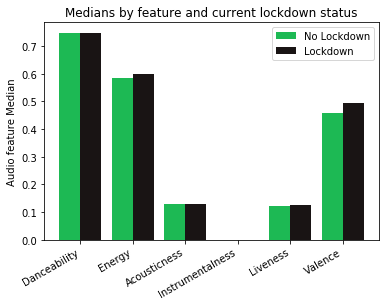

In [17]:
hist_comparing_features("United States")

#### Calculating Slope of Regression with Real Audio Values and Presence of Lockdown

In [18]:
calc_slope_of_regression("United States")

United States
Danceability
Lockdown Slope of Regression: 0.004139242424242431

Energy
Lockdown Slope of Regression: 0.01613830303030303

Acousticness
Lockdown Slope of Regression: -0.009755461818181816

Instrumentalness
Lockdown Slope of Regression: -0.0012402675727272677

Liveness
Lockdown Slope of Regression: 0.008856606060606054

Valence
Lockdown Slope of Regression: 0.03275278787878789



The above regression coefficients suggest a positive correlation between presence of lockdown and values of ```Danceability```, ```Energy```, ```Liveness```, and ```Valence```. It also suggests a negative correlation between presence of lockdown and values of ```Acousitcness``` and ```Instrumentalness```. This is consistent with the wider data set regression slopes.  

#### Specific Slope Comparisons
**Danceability:**
Regression coefficient is 0.017 smaller in US compared with complete data set. This indicates a weaker correlation between danceability and presence of lockdown compared with other countries.

**Energy:**
Regression coefficient is 0.011 smaller in US compared with complete data set. This indicates a weaker correlation between energy and presence of lockdown compared with other countries.

**Acousticness:**
Regression coefficient is 0.030 larger in US compared with complete data set. This indicates a weaker negative correlation between presence of lockdown and acousticness value of popular songs compared with other countries. 

**Instrumentalness:**
Regression coefficient is the same in US compared with complete data set. The negative coefficient indicates that instrumentalness decreases with the presence of a lockdown. 

**Liveness:**
Regression coefficient is 0.003 larger in US compared with complete data set. This indicates a stronger correlation between liveness and presence of lockdown compared with other countries.

**Valence:** 
Regression coefficient is 0.001 larger in US compared with complete data set. This indicates a slightly larger correlation between valence and presence of lockdown compared with other countries.

#### Histograms of Slope Regression Values with Presence of Lockdown and Permuted Values of Audio Feature

Danceability
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Danceability


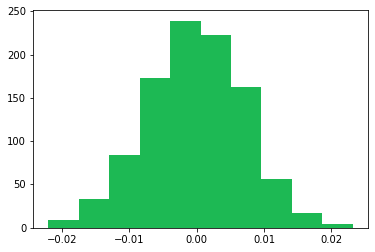

Energy
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Energy


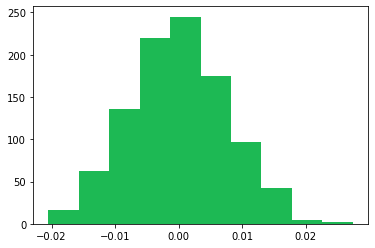

Acousticness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Acousticness


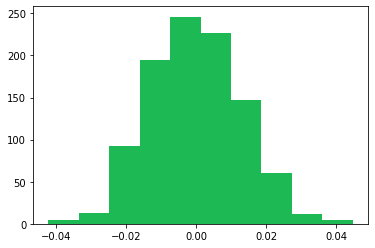

Instrumentalness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Instrumentalness


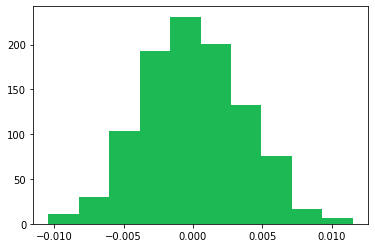

Liveness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Liveness


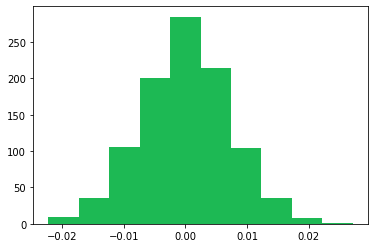

Valence
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Valence


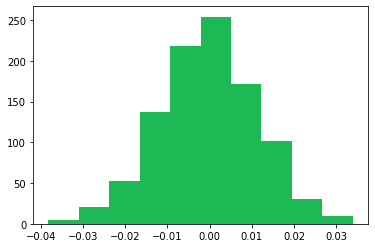

In [20]:
compare_to_permuted("United States")

**Danceability:** 
The slope of regression with real values of danceability is 0.004. The above histogram of random regression slopes averages around 0.00 with the highest value at 0.02. The actual slope of our regression lies toward the peak of the distribution. This means we can be fairly certain that the actual slope was actually due to random chance and there is **no real correlation** between danceability and presence of a lockdown.

**Energy:**
The slope of regression with real values of energy is 0.016. This value lies on our above histogram. This means that the actual regression slope could be due to random chance. However, because it is an extreme value, there is still a fair chance that there may be a **possible real positive correlation** between energy and presence of a lockdown. 

**Acousticness:**
The slope of regression with real values of acousticness is -0.01. This lies at a fairly comfortable spot on the above histrogram, which is centered at 0.00 and has a lowest value around -0.04. This means the real regression slope could very well be due to random chance and there is **no real correlation** between acousticness and presence of a lockdown. 

**Instrumentalness:**
The slope of regression with real values of instrumentalness is -0.001. This lies near the peak of our histogram. This means we can be fairly certain that the regression slope is in fact due to random chance and that there is **no real correlation** between instrumentalness and presence of a lockdown. 

**Liveness:**
The slope of regression with real values of liveness is 0.009. This lies near the peak of the histogram, which is at 0.00. The most extreme positive value of the histogram is around 0.002. These results tell us that we can be fairly certain that the actual regression slope is due to random chance and that there is **no real correlation** between liveness and presence of a lockdown

**Valence:** 
The slope of regression with real values of valence is 0.033. From our histogram, we can see that, though still possible, this value is unlikely to be due to random chance since it is an extreme value with few observed instances. Thus, it is **very likely that there is a real correlation** between valence and presence of a lockdown.

*note: in cases where actual regression slope lies on histogram but does not have many observed cases, further investigation is needed to come to a definitive answer*

#### US Listener's Favorite Song Since Start of Pandemic 

In [21]:
country_anthem("United States")

Track Name                                                    The Box
Artist                                                    Roddy Ricch
Streams                                                      24966901
URL                 https://open.spotify.com/track/0nbXyq5TXYPCO7p...
Week Start                                                    1/10/20
Week End                                                      1/17/20
Region                                                  United States
URI                                            0nbXyq5TXYPCO7pr3N8S4I
Danceability                                                    0.896
Energy                                                          0.586
Loudness                                                       -6.687
Acousticness                                                    0.104
Instrumentalness                                                    0
Liveness                                                         0.79
Valence             

### United States Recap

Listeners in the United Status showed a notable preference for happier music during lockdown periods (significant valence regression coefficient of 0.033). 

In general, US listeners have tastes in songs with higher danceability, instrumentalness, and liveness than other countries in the data set. 

Since the pandemic began, the most listened to song in the US is The Box by Roddy Ricch. 

[Listen Here](https://open.spotify.com/track/0nbXyq5TXYPCO7pr3N8S4I?si=QFWHZqbjTqKMmLS0qcpZhw)

## United Kingdom

#### Audio Feature Averages

In [22]:
lockdown_status_avg("United Kingdom")

United Kingdom
Danceability
No Lockdown Mean: 0.6956991666666682
Yes Lockdown Mean: 0.694994
No Lockdown Median: 0.708
Yes Lockdown Median: 0.7150000000000001


Energy
No Lockdown Mean: 0.6116916666666667
Yes Lockdown Mean: 0.6231200000000005
No Lockdown Median: 0.614
Yes Lockdown Median: 0.631


Acousticness
No Lockdown Mean: 0.2583635263749997
Yes Lockdown Mean: 0.24106094399999983
No Lockdown Median: 0.145
Yes Lockdown Median: 0.13


Instrumentalness
No Lockdown Mean: 0.010430317883333335
Yes Lockdown Mean: 0.009023667340000003
No Lockdown Median: 0.0
Yes Lockdown Median: 0.0


Liveness
No Lockdown Mean: 0.1662751666666666
Yes Lockdown Mean: 0.1661246
No Lockdown Median: 0.109
Yes Lockdown Median: 0.107


Valence
No Lockdown Mean: 0.49428525000000006
Yes Lockdown Mean: 0.5262783999999999
No Lockdown Median: 0.511
Yes Lockdown Median: 0.54




**Danceability** median increased by 0.007 during lockdown periods. Compared with the complete dataset of countries, on average, the UK listened to music with higher danceability levels during regular periods (0.001 higher) but lower levels during lockdown periods (0.016 lower). 

**Energy** median increased by 0.013 during lockdown periods. Compared with the complete dataset of countries, on average, the UK listened to music with lower energy levels during both lockdown (0.022 lower) and regular periods (0.012 lower).  

**Acousticness** median decreased by 0.015 during lockdown periods. Compared with the complete dataset of countries, on average, the UK listened to music with lower acousticness levels during both lockdown (0.044 lower) and regular periods (0.063 lower). 

**Instrumentalness** mean decreased by 0.0014 during lockdown periods. Compared with the complete dataset of countries, on average, the UK listened to music with roughly the same levels of instrumentalness during both lockdown (0.000067 difference) and regular periods (0.00023 difference). 

**Liveness** median decreased by 0.002 during lockdown periods. Compared with the complete dataset of countries, on average, the UK listened to music with lower liveness levels during both lockdown (0.007 lower) and regular periods (0.003 lower).  

**Valence** median increased by 0.029 during lockdown periods. Compared with the complete dataset of countries, on average, the UK listened to music with higher valence levels during regular periods (0.013 higher) but equal levels during lockdown periods (median of 0.54 for both overall data set and UK).


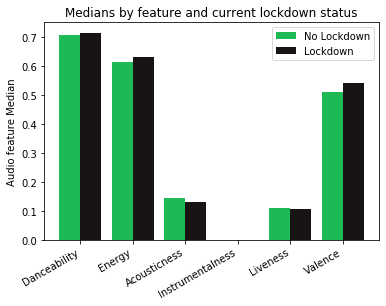

In [23]:
hist_comparing_features("United Kingdom")

#### Calculating Slope of Regression with Real Audio Values and Presence of Lockdown


In [24]:
calc_slope_of_regression("United Kingdom")

United Kingdom
Danceability
Lockdown Slope of Regression: -0.0007051666666666624

Energy
Lockdown Slope of Regression: 0.01142833333333333

Acousticness
Lockdown Slope of Regression: -0.017302582375

Instrumentalness
Lockdown Slope of Regression: -0.0014066505433333295

Liveness
Lockdown Slope of Regression: -0.00015056666666666435

Valence
Lockdown Slope of Regression: 0.03199315



The above slope of regression values suggest that there is a positive correlation between the presence of a lockdown and a higher value for `Energy` and `Valence` in songs. On the other hand, there appears to be a negative correlation between the presence of a lockdown and a higher value for `Danceability`, `Acousticness`, `Instrumentalness` and `Liveness`. This is not consistent with what was observed in the complete data set of all countries. 

**Danceability:** Regression coefficient is negative, unlike the positive coefficient for the overall data set. This appears to mean that that in the UK, there is a unique negative relationship between the presence of a lockdown and larger values of Danceability.

The negative regression coefficient may seem contradictory to the increase in medians from lockdown and no lockdown periods. However, the regression coefficient may be a better indicator of the model because the the model was fit against all data points with lockdown, whereas median just looks at the middle value in the data set. 

**Energy:** Regression coefficient is 0.016 smaller in the UK compared with complete data set. This indicates a weaker positive correlation between energy and presence of lockdown compared with other countries. 

**Acousticness:** Regression coefficient is 0.022 larger in the UK compared with complete data set. This indicates a weaker negative correlation between acousticness and presence of lockdown compared with other countries. 

**Instrumentalness:** Regression coefficient is 0.00016 smaller in the UK compared with complete data set. This indicates a stronger negative correlation between instrumentalness and presence of lockdown compared with other countries. 

**Liveness:** Regression coefficient is negative, unlike the positive coefficient in the overall data set. This means that in the UK, there is a unique negative relationship between the presence of a lockdown and higher values of Liveness.

**Valence:** Regression coefficient is 0.00028 larger in the UK compared with complete data set. This indicates a slightly stronger positive correlation between valence and presence of lockdown compared with other countries.

#### Histograms of Slope Regression Values with Presence of Lockdown and Permuted Values of Audio Feature

Danceability
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Danceability


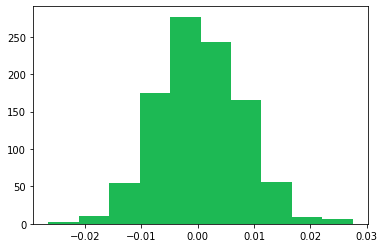

Energy
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Energy


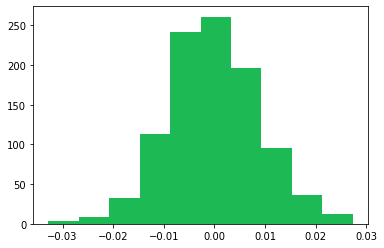

Acousticness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Acousticness


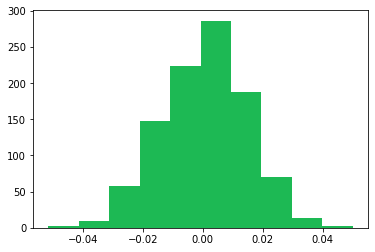

Instrumentalness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Instrumentalness


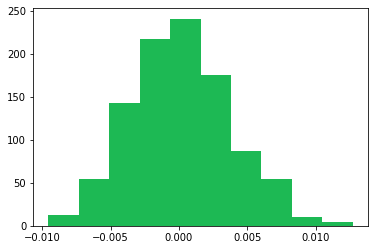

Liveness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Liveness


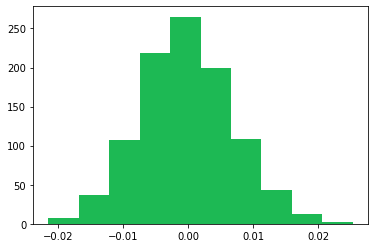

Valence
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Valence


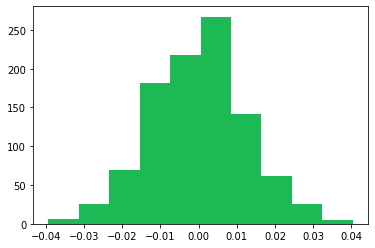

In [25]:
compare_to_permuted("United Kingdom")

**Danceability:** The slope of regression with real values of danceability is -0.0007. This value appears near the peak of the histogram. The large number of observations suggests that the actual regression slope could have very likely been a result of random chance and there is **no real negative correlation** between danceability and presence of a lockdown. 

**Energy:** The slope of regression with real values of energy is 0.011. This value appears on the histogram in between the peak and the maximum value. It is difficult to conclude with certainty if the actual slope was caused by random chance. However, because of a relatively high amount of observations, the actual regression slope could have been a result of random chance and there is **probably no real negative correlation** between energy and presence of a lockdown. 

**Acousticness:** The slope of regression with real values of acousticness is -0.017. This value appears on the histogram to the left of the peak. We can estimate between 75 and 125 observations of a slope around this value. Because of this, the actual regression slope could have very likely been a result of random chance and there is **no real negative correlation** between acousticness and presence of a lockdown. 

**Instrumentalness:** The slope of regression with real values of instrumentalness is -0.0014. This value appears well within the histogram. The actual regression slope could have very likely been a result of random chance and there is **no real negative correlation** between instrumentalness and presence of a lockdown.  

**Liveness:** The slope of regression with real values of liveness is -0.00015. This value appears well within the histogram. Thus, the actual regression slope could have very likely been a result of random chance and there is **no real negative correlation** between liveness and presence of a lockdown.

**Valence:** The slope of regression with real values of valence is 0.032. This value appears toward the extreme end of the histogram, near the maximum value of 0.04. There are few observations between 0.02 and 0.04. We can be fairly certain that the observed regression slope was not a result of random chance and that there is a **likely real positive correlation** between valence and the presence of a lockdown.  

*note: in cases where actual regression slope lies on histogram but does not have many observed cases, further investigation is needed to come to a definitive answer*

#### Explanation of correlations
Only one of the audio features were concluded to have a possible real correlation in the United Kingdom. Perhaps this is because of UK's relatively few lockdown weeks at the time of data collection. As a result, music tastes may not have had time to adjust to situation.

#### UK Listener's Favorite Song Since Start of Pandemic 

In [26]:
country_anthem("United Kingdom")

Track Name                                             No Time To Die
Artist                                                  Billie Eilish
Streams                                                       4537464
URL                 https://open.spotify.com/track/73SpzrcaHk0RQPF...
Week Start                                                    2/14/20
Week End                                                      2/21/20
Region                                                 United Kingdom
URI                                            73SpzrcaHk0RQPFP73vqVR
Danceability                                                     0.38
Energy                                                          0.219
Loudness                                                      -13.273
Acousticness                                                    0.917
Instrumentalness                                               0.0104
Liveness                                                       0.0827
Valence             

### United Kingdom Recap

Listeners in the UK showed a notable preference for songs with higher valence during lockdown periods. (Notable regression coefficient 0.032) Interestingly, during lockdown periods, UK listeners prefered songs with lower danceability measures than they normally did. Thus far into the analysis, this is a unique pattern. 

In general, UK listeners enjoy songs with higher danceability and valence measures than other countries in the data set. 

Since the pandemic began, the most listened to song in the UK is No Time to Die by Billie Eilish.

[Listen Here](https://open.spotify.com/track/73SpzrcaHk0RQPFP73vqVR?si=-W7kvsa-ThqJquzL1sMe6g)

## Spain

#### Audio Feature Averages

In [27]:
lockdown_status_avg("Spain")

Spain
Danceability
No Lockdown Mean: 0.7376918181818191
Yes Lockdown Mean: 0.7538533333333339
No Lockdown Median: 0.743
Yes Lockdown Median: 0.758


Energy
No Lockdown Mean: 0.6887827272727294
Yes Lockdown Mean: 0.7072350000000014
No Lockdown Median: 0.715
Yes Lockdown Median: 0.7165


Acousticness
No Lockdown Mean: 0.25239550909090885
Yes Lockdown Mean: 0.23893589999999998
No Lockdown Median: 0.16899999999999998
Yes Lockdown Median: 0.16899999999999998


Instrumentalness
No Lockdown Mean: 0.007409884390909096
Yes Lockdown Mean: 0.004190910599999999
No Lockdown Median: 0.0
Yes Lockdown Median: 1.39e-06


Liveness
No Lockdown Mean: 0.15786809090909076
Yes Lockdown Mean: 0.15990716666666668
No Lockdown Median: 0.11
Yes Lockdown Median: 0.107


Valence
No Lockdown Mean: 0.6332659090909093
Yes Lockdown Mean: 0.6499750000000004
No Lockdown Median: 0.675
Yes Lockdown Median: 0.677




**Danceability** median increased by 0.015 during lockdown periods. Compared with the complete dataset of countries, on average, Spain listened to music with higher danceability levels during both lockdown (0.027 higher) and regular periods (0.036 higher). 

**Energy** median increased slightly by 0.0015 during lockdown periods. Compared with the complete dataset of countries, on average, Spain had a slightly greater preference for music with higher energy values both during lockdown (0.064 higher) and regular periods (0.089 higher). 

**Acousticness** median at an average of 0.169 regardless of lockdown status. Compared with the complete dataset of countries, on average,  Spain listened to music with lower acousticness levels both during lockdown (0.0045 lower) and regular periods (0.039 lower). 

**Instrumentalness** mean decreased by 0.003 during lockdown periods in Spain. Compared with the complete dataset of countries, on average, Spain listened to music with lower instrumentalness levels during both lockdown (0.0048 lower) and regular periods (0.0029 lower). 

**Liveness** median decreased slightly by 0.0035 during lockdown periods. Compared with the complete dataset of countries, on average, Spain listened to music with lower liveness values than the rest of the countries in the data set both during lockdown (0.007 lower) and regular periods (0.0015 lower). 

**Valence** median in Spain increased slightly by 0.002 during lockdown periods. Compared with the complete dataset of countries, on average, Spain listened to music with higher valence levels during both lockdown (0.137 higher) and regular periods (0.177 higher).  


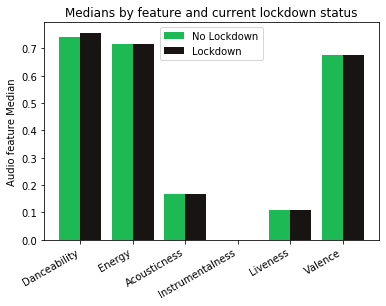

In [28]:
hist_comparing_features("Spain")

#### Calculating Slope of Regression with Real Audio Values and Presence of Lockdown


In [29]:
calc_slope_of_regression("Spain")

Spain
Danceability
Lockdown Slope of Regression: 0.016161515151515152

Energy
Lockdown Slope of Regression: 0.01845227272727273

Acousticness
Lockdown Slope of Regression: -0.01345960909090909

Instrumentalness
Lockdown Slope of Regression: -0.0032189737909090912

Liveness
Lockdown Slope of Regression: 0.0020390757575757578

Valence
Lockdown Slope of Regression: 0.016709090909090916



The above slope of regression values suggest that there is a positive correlation between the presence of a lockdown and a higher value for `Danceability`, `Energy`, `Liveness`, and `Valence` in songs. On the other hand, there appears to be a negative correlation between the presence of a lockdown and a higher value for `Acousticness` and `Instrumentalness`. This is consistent with what was observed in the complete data set.

**Danceability:** Regression coefficient is 0.0049 smaller in Spain compared with complete data set. This indicates a weaker positive correlation between danceability and presence of lockdown compared with other countries. 

**Energy:** Regression coefficient is 0.0086 smaller in Spain compared with complete data set. This indicates a weaker positive correlation between energy and presence of lockdown compared with other countries. 

**Acousticness:** Regression coefficient is 0.02628 larger in Spain compared with complete data set. This indicates a weaker negative correlation between acousticness and presence of lockdown compared with other countries. 

**Instrumentalness:** Regression coefficient is 0.002 smaller in Spain compared with complete data set. This indicates a stronger negative correlation between instrumentalness and presence of lockdown compared with other countries. 

**Liveness:** Regression coefficient is 0.0039 smaller in Spain compared with complete data set. This indicates a weaker positive correlation between liveness and presence of lockdown compared with other countries. 

**Valence:** Regression coefficient is 0.015 smaller in Spain compared with complete data set. This indicates a weaker positive correlation between valence and presence of lockdown compared with other countries. 


#### Histograms of Slope Regression Values with Presence of Lockdown and Permuted Values of Audio Feature

Danceability
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Danceability


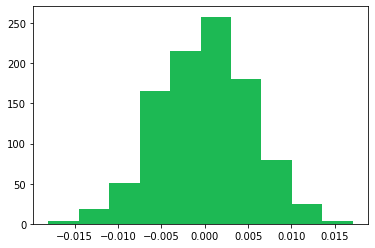

Energy
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Energy


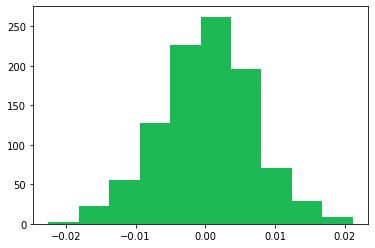

Acousticness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Acousticness


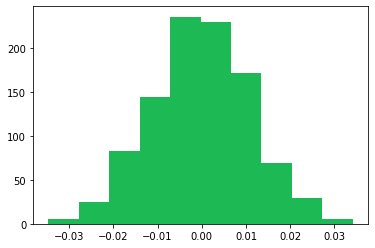

Instrumentalness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Instrumentalness


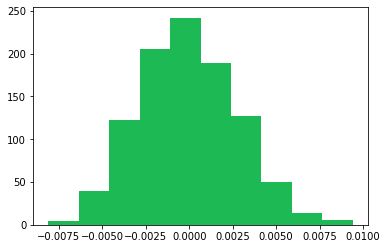

Liveness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Liveness


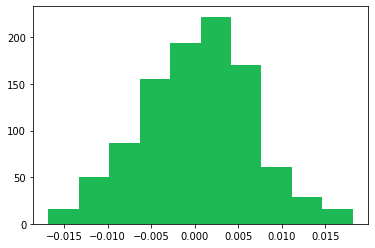

Valence
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Valence


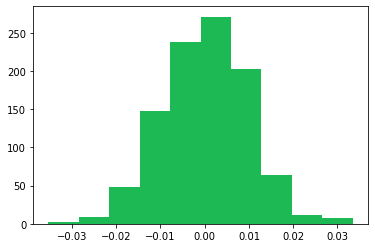

In [30]:
compare_to_permuted("Spain")

**Danceability:** The slope of regression with real values of danceability is 0.014. This value appears on the above histogram of random regression slopes, which is centered at 0.00 and has a largest positive value around 0.015. However, it is an extreme value with less than 50 observations, so we can be fairly certain that the observed regression slope was not a result of random chance and that there is a **very likely real positive correlation** between danceability and the presence of a lockdown.  

**Energy:** The slope of regression with real values of energy is 0.018. This lies to the right of the histogram of random regression slopes, which is centered at 0.00 and has a maximum value of around 0.02. Because it is found at an extreme, with less than 50 observations, we can be fairly certain, though not completely sure, that the actual regression slope was not a result of random chance and that there is a **very likely real positive correlation** between energy and the presence of a lock down. 

**Acousticness:** The slope of regression with real values of acousticness is -0.013. This lies to the left of the peak of our histogram. However, it is not quite an extreme value. Because of this, the actual regression slope could have very likely been a result of random chance and there is **no real negative correlation** between acousticness and presence of a lockdown. 


**Instrumentalness:** The slope of regression with real values of instrumentalness is -0.0032. This value lies to the left of the peak of the histogram, but with around 150 observed instances, there is a good chance the actual slope could have been a result of random chance. Because of this, we conclude that there is **likely no real negative correlation** between instrumentalness and presence of a lockdown. 

**Liveness:** The slope of regression with real values of liveness is 0.00204. This is very close to the peak of our histogram, which is centered around 0.00. Because of this, the actual slope is likely a result of random chance and there is **no real correlation** between liveness and presence of a lockdown. 

**Valence:** The slope of regression with real values of valence is 0.0167. This lies to the right of the peak of our histogram, which is between 0.00 and 0.01. Because of it's position on the histogram, we cannot safely conclude that the slope was not a result of random chance. Thus, there is **likely no real correlation** between valence and presence of a lockdown. 

*note: in cases where actual regression slope lies on histogram but does not have many observed cases, further investigation is needed to come to a definitive answer*

#### Spain Listener's Favorite Song Since Start of Pandemic 

In [32]:
country_anthem("Spain")

Track Name                                                       Tusa
Artist                                                        KAROL G
Streams                                                       4122952
URL                 https://open.spotify.com/track/7k4t7uLgtOxPwTp...
Week Start                                                    1/24/20
Week End                                                      1/31/20
Region                                                          Spain
URI                                            7k4t7uLgtOxPwTpFmtJNTY
Danceability                                                    0.803
Energy                                                          0.715
Loudness                                                        -3.28
Acousticness                                                    0.295
Instrumentalness                                             0.000134
Liveness                                                       0.0574
Valence             

### Spain Recap

Listeners in Spain showed a notable preference for songs with higher energy and danceability values during lockdown periods. (Notable regression coefficients of 0.014 and 0.018, respectively)

In general, Spain listeners enjoy songs with higher danceability, energy and valence measures than other countries in the data set.

Since the pandemic began, the most listened to song in Spain is Tusa by Karol G and Nicki Minaj.

[Listen Here](https://open.spotify.com/track/7k4t7uLgtOxPwTpFmtJNTY?si=Y9X8IYsgRPGnJ2LMWgOaaA)

## Italy

Italy had the largest and strictest Coronavirus Lockdown (BBC). Because of this, we initially predicted that the differences in lockdown and no lockdown audio features may be the most pronounced. However, the findings were similar with what we saw in other countries.

#### Audio Feature Averages


In [33]:
lockdown_status_avg("Italy")

Italy
Danceability
No Lockdown Mean: 0.6854899999999997
Yes Lockdown Mean: 0.6942599999999993
No Lockdown Median: 0.7
Yes Lockdown Median: 0.7204999999999999


Energy
No Lockdown Mean: 0.6538677777777773
Yes Lockdown Mean: 0.6716937499999998
No Lockdown Median: 0.6609999999999999
Yes Lockdown Median: 0.6779999999999999


Acousticness
No Lockdown Mean: 0.20404020000000014
Yes Lockdown Mean: 0.18469751250000002
No Lockdown Median: 0.13
Yes Lockdown Median: 0.124


Instrumentalness
No Lockdown Mean: 0.006643935933333332
Yes Lockdown Mean: 0.0052073765375000025
No Lockdown Median: 0.0
Yes Lockdown Median: 0.0


Liveness
No Lockdown Mean: 0.16977433333333297
Yes Lockdown Mean: 0.1696973749999999
No Lockdown Median: 0.1145
Yes Lockdown Median: 0.113


Valence
No Lockdown Mean: 0.48287300000000016
Yes Lockdown Mean: 0.49342037499999997
No Lockdown Median: 0.4835
Yes Lockdown Median: 0.498




**Danceability** median increased by 0.02 during lockdown periods. Compared with the complete dataset of countries, on average, Italy listened to music with lower danceability levels during both lockdown (0.011 lower) and regular periods (0.07 lower). 

**Energy** median increased by 0.017 during lockdown periods. Compared with the complete dataset of countries, on average, Italy listened to music with higher energy levels during both lockdown (0.025 higher) and regular periods (0.035 higher).  

**Acousticness** median decreased by 0.006 during lockdown periods. Compared with the complete dataset of countries, on average, Italy listened to music with lower acousticness levels during both lockdown (0.05 lower) and regular periods (0.078 lower). 

**Instrumentalness** mean decreased by 0.0014 during lockdown periods. Compared with the complete dataset of countries, on average, Italy listened to music with lower instrumentalness levels during both lockdown (0.0037 lower) and regular periods (0.0036 lower). 

**Liveness** median decreased slightly by 0.0015 during lockdown periods. Compared with the complete dataset of countries, on average, Italy listened to music with higher liveness levels during regular periods (0.0025 higher) and slightly lower levels during lockdown periods (0.001 lower)  

**Valence** median increased by 0.0145 during lockdown periods. Compared with the complete dataset of countries, on average, Italy listened to music with slightly lower valence levels during both lockdown (0.042 lower) and regular periods (0.015 lower).


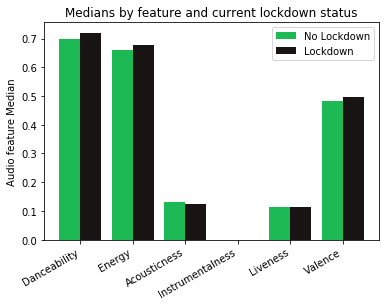

In [34]:
hist_comparing_features("Italy")

#### Calculating Slope of Regression with Real Audio Values and Presence of Lockdown


In [35]:
calc_slope_of_regression("Italy")

Italy
Danceability
Lockdown Slope of Regression: 0.008770000000000002

Energy
Lockdown Slope of Regression: 0.01782597222222223

Acousticness
Lockdown Slope of Regression: -0.019342687499999997

Instrumentalness
Lockdown Slope of Regression: -0.0014365593958333353

Liveness
Lockdown Slope of Regression: -7.6958333333336e-05

Valence
Lockdown Slope of Regression: 0.010547375000000006



The above slope of regression values suggest that there is a positive correlation between the presence of a lockdown and a higher value for `Danceability`, `Energy` and `Valence` in songs. On the other hand, there appears to be a negative correlation between the presence of a lockdown and a higher value for `Acousticness` , `Instrumentalness` and `Liveness`. This is inconsistent with what was observed in the complete data set.


**Danceability:** Regression coefficient is 0.012 smaller in Italy compared with complete data set. This indicates a weaker positive correlation between danceability and presence of lockdown compared with other countries.

**Energy:** Regression coefficient is 0.009 smaller in Italy compared with complete data set. This indicates a slightly weaker positive correlation between energy and presence of lockdown compared with other countries.

**Acousticness:** Regression coefficient is 0.02 larger in Italy compared with complete data set. This indicates a weaker negative correlation between acousticness and presence of lockdown compared with other countries.

**Instrumentalness:** Regression coefficient is 0.0002 smaller in Italy compared with complete data set. This indicates a slightly stronger negative correlation between instrumentalness and presence of lockdown compared with other countries.

**Liveness:** Regression coefficient is negative, unlike the positive slope found in the complete data set. This means that liveness in songs in Italy has an opposite correlation to lockdown presence compared with all of the countries. This pattern was also seen in the United Kingdom.

**Valence:** Regression coefficient is 0.02 smaller in Italy compared with complete data set. This indicates a weaker positive correlation between valence and presence of lockdown compared with other countries.

#### Histograms of Slope Regression Values with Presence of Lockdown and Permuted Values of Audio Feature

Danceability
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Danceability


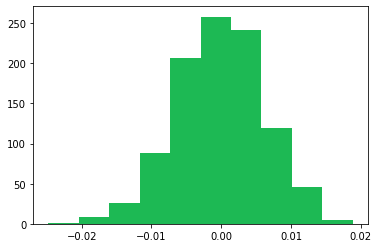

Energy
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Energy


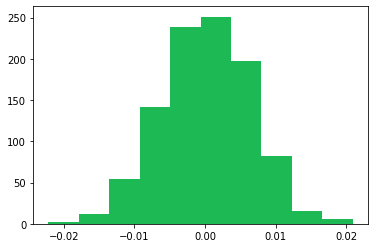

Acousticness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Acousticness


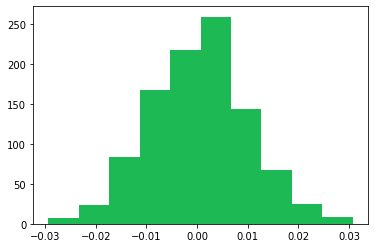

Instrumentalness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Instrumentalness


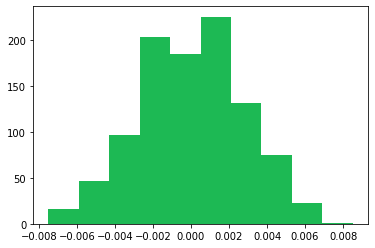

Liveness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Liveness


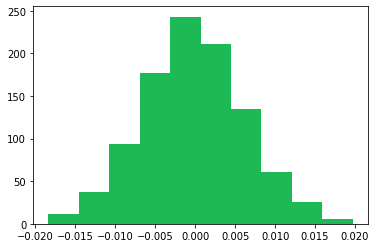

Valence
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Valence


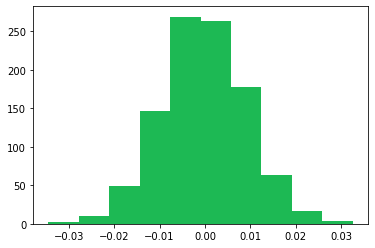

In [36]:
compare_to_permuted("Italy")

**Danceability:** The slope of regression with real values of danceability is 0.0088. This value lies well within the histogram. Because of this, we can conclude that the actual regression slope could have very likely been a result of random chance and there is **no real positive correlation** between danceability and presence of a lockdown.

**Energy:** The slope of regression with real values of energy is 0.018. This value appears on the histogram near the maximum value of 0.02. Because this is an extreme value with very few observations, we can be fairly certain that the observed regression slope was not a result of random chance and that there is a **likely real positive correlation** between energy and the presence of a lockdown.

**Acousticness:** The slope of regression with real values of acousticness is -0.0193. This value appears on the histogram with around under 50 observations. Because of the low amount of observations and it's location at the negative extreme of the histogram, we can be fairly certain that the observed regression slope was not a result of random chance and that there is a **probable real negative correlation** between acousticness and the presence of a lockdown. 

**Instrumentalness:** The slope of regression with real values of instrumentalness is -0.00144. This value appears well within the bounds of the histogram. Because of this, we can assume that the actual regression slope could have very likely been a result of random chance and there is **no real negative correlation** between instrumentalness and presence of a lockdown.

**Liveness:** The slope of regression with real values of liveness is -0.00007. This value appears well within the bounds of the histogram. Because of this, we can assume that the actual regression slope could have very likely been a result of random chance and there is **no real negative correlation** between liveness and presence of a lockdown. 

**Valence:** The slope of regression with real values of valence is 0.012. This value appears between the peak and upper limit of the histogram, with between 50 and 100 observations. Because of the large number of observations, the actual regression slope could have very likely been a result of random chance and there is **most likely no real correlation** between acousticness and presence of a lockdown.

*note: in cases where actual regression slope lies on histogram but does not have many observed cases, further investigation is needed to come to a definitive answer*

#### Italy Listener's Favorite Song Since Start of Pandemic 

In [37]:
country_anthem("Italy")

Track Name                                                   Auto Blu
Artist                                                          Shiva
Streams                                                       5689467
URL                 https://open.spotify.com/track/2chEq24EHjyw9Zj...
Week Start                                                    3/27/20
Week End                                                       4/3/20
Region                                                          Italy
URI                                            2chEq24EHjyw9Zjmwq0hlS
Danceability                                                     0.82
Energy                                                          0.783
Loudness                                                       -6.146
Acousticness                                                   0.0158
Instrumentalness                                                    0
Liveness                                                       0.0938
Valence             

### Italy Recap

Listeners in Italy showed a notable prefernce for songs with higher energy (regression coeff: 0.018) and less acousticness (regression coeff: -0.019) during lockdown periods. 

In general, Italy listeners enjoy songs with higher energy and livenss measures than dataset average.

Since the pandemic began, the most listened to song in Italy is Auto Blue by Shiva and Eiffel 65.

[Listen Here](https://open.spotify.com/track/2chEq24EHjyw9Zjmwq0hlS?si=bWffbF5cTDScDYSkZd279A)

## France

#### Audio Feature Averages


In [38]:
lockdown_status_avg("France")

France
Danceability
No Lockdown Mean: 0.7328681818181819
Yes Lockdown Mean: 0.7357516666666668
No Lockdown Median: 0.746
Yes Lockdown Median: 0.756


Energy
No Lockdown Mean: 0.6334027272727274
Yes Lockdown Mean: 0.6479000000000003
No Lockdown Median: 0.652
Yes Lockdown Median: 0.6729999999999999


Acousticness
No Lockdown Mean: 0.3349467554545448
Yes Lockdown Mean: 0.3218250666666668
No Lockdown Median: 0.2995
Yes Lockdown Median: 0.286


Instrumentalness
No Lockdown Mean: 0.014695838072727282
Yes Lockdown Mean: 0.015923246966666665
No Lockdown Median: 0.0
Yes Lockdown Median: 0.0


Liveness
No Lockdown Mean: 0.16540799999999986
Yes Lockdown Mean: 0.15955583333333323
No Lockdown Median: 0.1185
Yes Lockdown Median: 0.114


Valence
No Lockdown Mean: 0.518695363636363
Yes Lockdown Mean: 0.5351065
No Lockdown Median: 0.5095000000000001
Yes Lockdown Median: 0.537




**Danceability** median increased by 0.009 during lockdown periods. Compared with the complete dataset of countries, on average, France listened to music with higher danceability levels during both lockdown (0.025 higher) and regular periods (0.04 higher). 

**Energy** median increased by 0.021 during lockdown periods. Compared with the complete dataset of countries, on average, France listened to music with higher energy levels during both lockdown (0.02 higher) and regular periods (0.026 higher).  

**Acousticness** median decreased by 0.013 during lockdown periods. Compared with the complete dataset of countries, on average, France listened to music with higher acousticness levels during both lockdown (0.1125 higher) and regular periods (0.091 higher). 

**Instrumentalness** mean increased by 0.0017 during lockdown periods. Compared with the complete dataset of countries, on average, France listened to music with higher instrumentalness levels during both lockdown (0.007 higher) and regular periods (0.004 higher). 

**Liveness** median decreased by 0.004 during lockdown periods. Compared with the complete dataset of countries, on average, France listened to music with higher levels of liveness during regular periods (0.006 higher) but equal levels during lockdown periods. 

**Valence** median increased by 0.029 during lockdown periods. Compared with the complete dataset of countries, on average, France listened to music with higher valence levels during regular periods (0.01 higher) but slightly lower values during lockdown periods (0.003 lower).

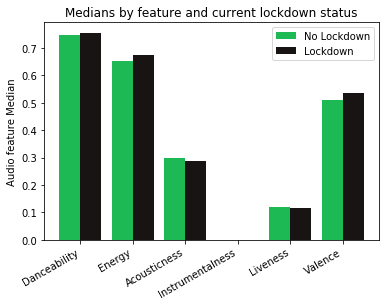

In [39]:
hist_comparing_features("France")

#### Calculating Slope of Regression with Real Audio Values and Presence of Lockdown


In [40]:
calc_slope_of_regression("France")

France
Danceability
Lockdown Slope of Regression: 0.0028834848484848553

Energy
Lockdown Slope of Regression: 0.014497272727272728

Acousticness
Lockdown Slope of Regression: -0.013121688787878795

Instrumentalness
Lockdown Slope of Regression: 0.0012274088939393923

Liveness
Lockdown Slope of Regression: -0.00585216666666667

Valence
Lockdown Slope of Regression: 0.016411136363636367



The above slope of regression values suggest that there is a positive correlation between the presence of a lockdown and a higher value for  `Danceability`, `Energy`, `Instrumentalness`, and `Valence` in songs. On the other hand, there appears to be a negative correlation between the presence of a lockdown and a higher value for `Acousticness` and `Liveness`. This is inconsistent with what was observed in the complete data set. 

**Danceability:** Regression coefficient is 0.018 smaller in France compared with complete data set. This indicates a weaker positive correlation between danceability and presence of lockdown compared with other countries. 

**Energy:** Regression coefficient is 0.013 smaller in France compared with complete data set. This indicates a weaker positive correlation between energy and presence of lockdown compared with other countries. 

**Acousticness:** Regression coefficient is 0.03 larger in France compared with complete data set. This indicates a weaker negative correlation between acousticness and presence of lockdown compared with other countries. 

**Instrumentalness:** Regression coefficient is positive in France, unlike the regression coefficient calculated with the complete data set. This is the only country thus far into the analysis with a inverse relationship between higher values of instrumentalness and the presence of a lockdown. 

**Liveness:** Regression coefficient is negative, unlike the regression coefficient calculated with the complete data set. This means in the presence of a lockdown, songs with lower liveness values are prefered. This was also seen in the UK and Italy. 

**Valence:** Regression coefficient is 0.015 smaller in France compared with complete data set. This indicates a weaker positive correlation between valence and presence of lockdown compared with other countries. 


#### Histograms of Slope Regression Values with Presence of Lockdown and Permuted Values of Audio Feature

Danceability
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Danceability


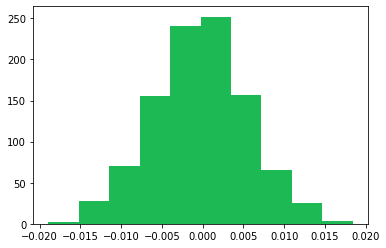

Energy
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Energy


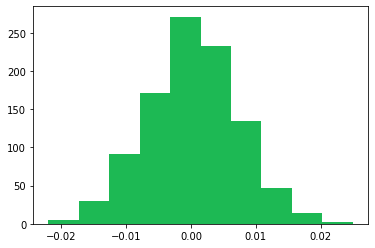

Acousticness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Acousticness


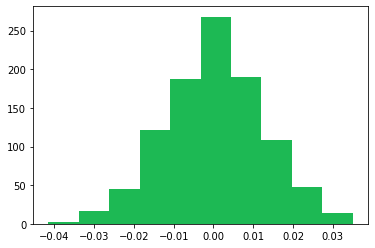

Instrumentalness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Instrumentalness


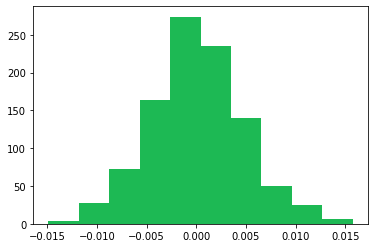

Liveness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Liveness


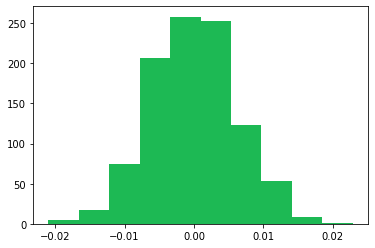

Valence
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Valence


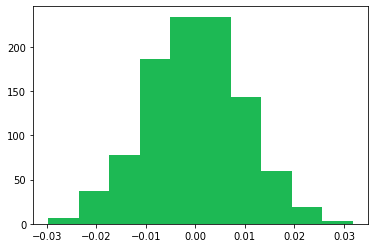

In [41]:
compare_to_permuted("France")

**Danceability:** The slope of regression with real values of danceability is 0.0028. This value appears well within the bounds of the histogram. Thus, the actual regression slope could have very likely been a result of random chance and there is **no real positive correlation** between danceability and presence of a lockdown.

**Energy:** The slope of regression with real values of energy is 0.014. This value appears between the peak and maximum value of the histogram. It seems to be an extreme value, with observations below 50. Because of this, we can be fairly certain, though not completely sure,  that the observed regression slope was not a result of random chance and that there is a **probable real positive correlation** between energy and the presence of a lockdown.  

**Acousticness:** The slope of regression with real values of acousticness is -0.013. This value appears well within the bounds of the histogram. The actual regression slope could have very likely been a result of random chance and there is **no real negative correlation** between acousticness and presence of a lockdown. 


**Instrumentalness:** The slope of regression with real values of instrumentalness is 0.0012. This value appears well within the bounds of the histogram. Thus, the actual regression slope could have very likely been a result of random chance and there is **no real positive correlation** between instrumentalness and presence of a lockdown.

**Liveness:** The slope of regression with real values of liveness is -0.006.  This value appears between the peak of the histogram and it's minimum value. It is not extreme enough to rule out random chance as a possible reason for the slope. Thus, the actual regression slope could have very likely been a result of random chance and there is **no real negative correlation** between liveness and presence of a lockdown. 

**Valence:** The slope of regression with real values of valence is 0.016. This value appears between the peak and maximum value of the histogram. It is not quite an extreme value. Thus, the actual regression slope could have very likely been a result of random chance and there is **no real negative correlation** between valence and presence of a lockdown.  

*note: in cases where actual regression slope lies on histogram but does not have many observed cases, further investigation is needed to come to a definitive answer*

#### Explanation of correlations
Only one of the audio features were concluded to have a possible real correlation in France. The lockdown in France began on 3/17. By 3/28, the government had already announced a detail plan to exit lockdown ([The Guardian](https://www.theguardian.com/world/2020/apr/28/france-and-spain-announcement-lockdowns-ease)). We suggest that clear direction and vision from the government helped alleviate worries and led to a lockdown experience different from that experienced by other countries. This may have affected music tastes and the results of our analysis. 

#### France Listener's Favorite Song Since Start of Pandemic 

In [42]:
country_anthem("France")

Track Name                                         Lettre Ã une femme
Artist                                                          Ninho
Streams                                                       5884933
URL                 https://open.spotify.com/track/5HEtuK03ygUzqca...
Week Start                                                     3/6/20
Week End                                                      3/13/20
Region                                                         France
URI                                            5HEtuK03ygUzqca6yfgOYZ
Danceability                                                    0.487
Energy                                                          0.398
Loudness                                                       -9.901
Acousticness                                                    0.835
Instrumentalness                                                    0
Liveness                                                         0.12
Valence             

### France Recap

Listeners in France showed a notable prefernce for songs with higher energy (regression coeff: 0.014) during lockdown periods. 

In general, listeners enjoy songs with higher measures of all five audio feautures as compared to other countries in the data set.

Since the pandemic began, the most listened to song in France is Lettre á une femme by Ninho.

[Listen Here](https://open.spotify.com/track/10rwyGbKAWZ8JZbL7uHl28?si=2FXCy4GOQgq83X2ZaaJnxQ)

## Switzerland

#### Audio Feature Averages


In [43]:
lockdown_status_avg("Switzerland")

Switzerland
Danceability
No Lockdown Mean: 0.7034781818181833
Yes Lockdown Mean: 0.7063149999999994
No Lockdown Median: 0.7190000000000001
Yes Lockdown Median: 0.7070000000000001


Energy
No Lockdown Mean: 0.6176245454545454
Yes Lockdown Mean: 0.618496666666667
No Lockdown Median: 0.6505
Yes Lockdown Median: 0.6375


Acousticness
No Lockdown Mean: 0.2743065545454538
Yes Lockdown Mean: 0.25601165000000015
No Lockdown Median: 0.188
Yes Lockdown Median: 0.156


Instrumentalness
No Lockdown Mean: 0.011877676872727276
Yes Lockdown Mean: 0.013365167183333334
No Lockdown Median: 0.0
Yes Lockdown Median: 0.0


Liveness
No Lockdown Mean: 0.16751490909090896
Yes Lockdown Mean: 0.1661968333333334
No Lockdown Median: 0.111
Yes Lockdown Median: 0.1095


Valence
No Lockdown Mean: 0.5002186363636357
Yes Lockdown Mean: 0.511809
No Lockdown Median: 0.505
Yes Lockdown Median: 0.5205




**Danceability** median decreased by 0.012 during lockdown periods. Compared with the complete dataset of countries, on average, Switerland listened to music with higher danceability levels during regular periods (0.012 higher) but lower levels during lockdown periods (0.024 lower). 

**Energy** median decreased by 0.013 during lockdown periods. Compared with the complete dataset of countries, on average, Switzerland listened to music with higher energy levels during regular periods (0.0245 higher) but lower levels during lockdown periods (0.0155 lower). 

**Acousticness** median decreased by 0.032 during lockdown periods. Compared with the complete dataset of countries, on average, Switzerland listened to music with lower acousticness levels during regular periods (0.02 lower) and lower levels during lockdown periods (0.0175 lower). 

**Instrumentalness** mean decreased by 0.0015 during lockdown periods. Compared with the complete dataset of countries, on average, Switzerland listened to music with higher levels of instrumentalness during regular periods (0.00168 higher) and lockdown periods (0.0044 higher). 

**Liveness** median decreased by 0.0015 during lockdown periods. Compared with the complete dataset of countries, on average, Switzerland listened to music with lower liveness levels during regular periods (0.001 lower) and lockdown periods (0.0045 lower).  

**Valence** median increased by 0.015 during lockdown periods. Compared with the complete dataset of countries, on average, Switzerland listened to music with higher valence levels during regular periods (0.007 higher) and lower levels during lockdown periods (0.0195 lower).

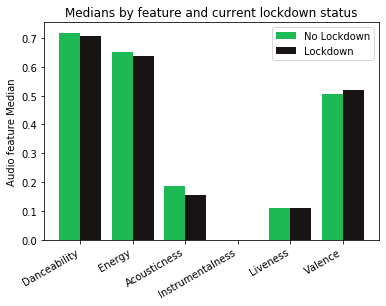

In [44]:
hist_comparing_features("Switzerland")

#### Calculating Slope of Regression with Real Audio Values and Presence of Lockdown


In [45]:
calc_slope_of_regression("Switzerland")

Switzerland
Danceability
Lockdown Slope of Regression: 0.0028368181818181817

Energy
Lockdown Slope of Regression: 0.0008721212121212148

Acousticness
Lockdown Slope of Regression: -0.018294904545454543

Instrumentalness
Lockdown Slope of Regression: 0.0014874903106060664

Liveness
Lockdown Slope of Regression: -0.0013180757575757568

Valence
Lockdown Slope of Regression: 0.011590363636363652



The above slope of regression values suggest that there is a positive correlation between the presence of a lockdown and a higher value for  `Danceability`, `Energy`, `Instrumentalness`, and `Valence` in songs. On the other hand, there appears to be a negative correlation between the presence of a lockdown and a higher value for `Acousticness` and `Liveness`.

#### Specific Slope Comparisons

**Danceability:** Regression coefficient is 0.0183 smaller in Switzerland compared with complete data set. This indicates a weaker positive correlation between danceability and presence of lockdown compared with other countries. 

**Energy:** Regression coefficient is 0.026 smaller in Switzerland compared with complete data set. This indicates a weaker positive correlation between energy and presence of lockdown compared with other countries. 

**Acousticness:** Regression coefficient is 0.0215 larger in Switzerland compared with complete data set. This indicates a weaker negative correlation between acousticness and presence of lockdown compared with other countries. 

**Instrumentalness:** Regression coefficient is positive, unlike the negative coefficient in the data set for all countries. This means that in Switzerland, there is a unique positive correlation between the presence of a lockdown and higher values of Instrumentalness.

**Liveness:** Regression coefficient is negative, unlike the positive coefficient in the data set for all countries. This means that in Switzerland, there is a unique negative correlation between the presence of a lockdown and higher values of Liveness. 

**Valence:** Regression coefficient is 0.0201 smaller in Switzerland compared with complete data set. This indicates a weaker positive correlation between valence and presence of lockdown compared with other countries. 

#### Histograms of Slope Regression Values with Presence of Lockdown and Permuted Values of Audio Feature


Danceability
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Danceability


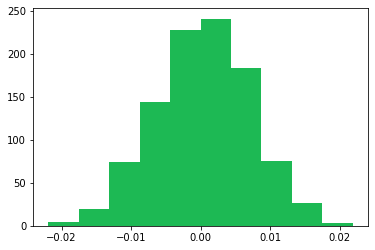

Energy
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Energy


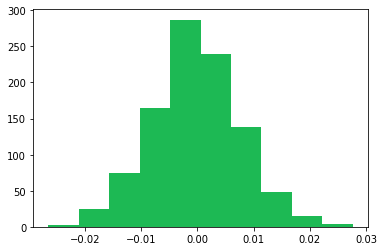

Acousticness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Acousticness


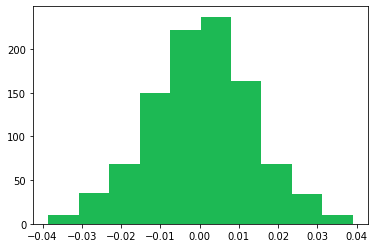

Instrumentalness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Instrumentalness


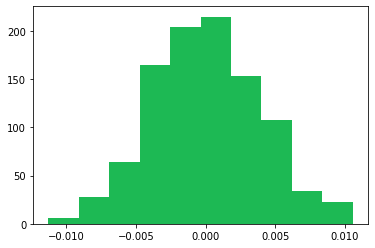

Liveness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Liveness


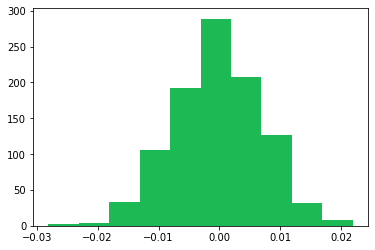

Valence
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Valence


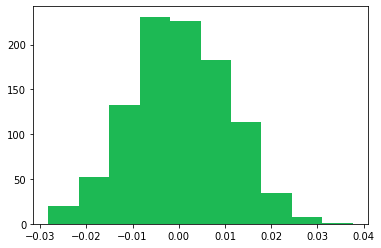

In [47]:
compare_to_permuted("Switzerland")

**Danceability:** The slope of regression with real values of danceability is 0.00284. This value appears near the peak of the histogram. The large number of observations suggests that the actual regression slope could have very likely been a result of random chance and there is **no real positive correlation** between danceability and presence of a lockdown. 

**Energy:** The slope of regression with real values of energy is 0.00087. This value appears near the peak of the histogram. The large number of observations suggests that the actual regression slope could have very likely been a result of random chance and there is **no real positive correlation** between energy and presence of a lockdown. 

**Acousticness:** The slope of regression with real values of acousticness is -0.0183. This value appears on the histogram to the left of the peak with a significant number of observations of this slope. Because of this, the actual regression slope could have very likely been a result of random chance and there is **no real negative correlation** between acousticness and presence of a lockdown. 

**Instrumentalness:** The slope of regression with real values of instrumentalness is 0.00149. This value appears well within the histogram with a significant number of observations of this slope. The actual regression slope could have very likely been a result of random chance and there is **no real positive correlation** between instrumentalness and presence of a lockdown.  

**Liveness:** The slope of regression with real values of liveness is -0.00132. This value appears well within the histogram. Thus, the actual regression slope could have very likely been a result of random chance and there is **no real negative correlation** between liveness and presence of a lockdown.

**Valence:** The slope of regression with real values of valence is 0.0116. There are a considerable amount of observations with this slope value. Therefore, the actual regression slope could have very likely been a result of random chance and there is **no real positive correlation** between valence and presence of a lockdown.

*note: in cases where actual regression slope lies on histogram but does not have many observed cases, further investigation is needed to come to a definitive answer*

#### Explanation of Correlations
Overall, there were no real significant correlations in Switzerland between the presence of a lockdown and song attributes. We suggest that this can be attributed to the overall quick decline in coronavirus cases in Switzerland despite the initial quick increase in cases. Additionally, the success of lockdown measures in Switzerland is allowing relaxations of certain lockdown measures sooner than initially expected. Therefore, the overall success of lockdown on the country may be the reason behind no significant effects on song tastes in Switzerland.

#### Switzerland Listener's Favorite Song Since Start of Pandemic 

In [48]:
country_anthem("Switzerland")

Track Name                                               Dance Monkey
Artist                                                    Tones And I
Streams                                                        404118
URL                 https://open.spotify.com/track/1rgnBhdG2JDFTbY...
Week Start                                                    1/10/20
Week End                                                      1/17/20
Region                                                    Switzerland
URI                                            1rgnBhdG2JDFTbYkYRZAku
Danceability                                                    0.825
Energy                                                          0.593
Loudness                                                       -6.401
Acousticness                                                    0.688
Instrumentalness                                             0.000161
Liveness                                                         0.17
Valence             

### Switzerland Recap

Listeners in Switzerland showed a notable preference for happier music during lockdown periods (significant valence regression coefficient of 0.0116). 

In general, Switzerland listeners seem to prefer songs with lower danceability and energy than other countries in the data set. 

Since the pandemic began, the most listened to song in Switzerland is Dance Monkey by Tones and I. 

[Listen Here](https://open.spotify.com/track/1rgnBhdG2JDFTbYkYRZAku)

## Portugal

#### Audio Feature Averages


In [50]:
lockdown_status_avg("Portugal")

Portugal
Danceability
No Lockdown Mean: 0.6986384615384605
Yes Lockdown Mean: 0.7094
No Lockdown Median: 0.721
Yes Lockdown Median: 0.73


Energy
No Lockdown Mean: 0.5890789230769247
Yes Lockdown Mean: 0.6003700000000002
No Lockdown Median: 0.593
Yes Lockdown Median: 0.6025


Acousticness
No Lockdown Mean: 0.34188566923076913
Yes Lockdown Mean: 0.33699032499999987
No Lockdown Median: 0.3
Yes Lockdown Median: 0.292


Instrumentalness
No Lockdown Mean: 0.009683865038461527
Yes Lockdown Mean: 0.009182670925000004
No Lockdown Median: 0.0
Yes Lockdown Median: 0.0


Liveness
No Lockdown Mean: 0.14574023076923065
Yes Lockdown Mean: 0.15491225000000003
No Lockdown Median: 0.11
Yes Lockdown Median: 0.114


Valence
No Lockdown Mean: 0.4998639230769228
Yes Lockdown Mean: 0.5317415000000003
No Lockdown Median: 0.508
Yes Lockdown Median: 0.5415000000000001




**Danceability** median increased by 0.009 during lockdown periods. Compared with the complete dataset of countries, on average, Portugal listened to music with higher danceability levels during regular periods (0.014 higher) but lower levels during lockdown periods (0.001 lower). 

**Energy** median increased by 0.0095 during lockdown periods. Compared with the complete dataset of countries, on average, Portugal listened to music with lower energy levels during regular periods (0.033 lower) and lower levels during lockdown periods (0.0505 lower). 

**Acousticness** median decreased by 0.008 during lockdown periods. Compared with the complete dataset of countries, on average, Portugal listened to music with higher acousticness levels during regular periods (0.092 higher) and higher levels during lockdown periods (0.1185 higher). 

**Instrumentalness** mean decreased by 0.000501 during lockdown periods. Compared with the complete dataset of countries, on average, Portugal listened to music with slightly lower levels of instrumentalness during regular periods (0.000512 lower) and slightly higher levels during lockdown periods (0.000226 higher). 

**Liveness** median increased slightly by 0.004 during lockdown periods. Compared with the complete dataset of countries, on average, Portugal listened to music with lower liveness levels during regular periods (0.002 lower) and about the same liveness level during lockdown periods (both 0.114).  

**Valence** median increased by 0.0335 during lockdown periods. Compared with the complete dataset of countries, on average, Portugal listened to music with higher valence levels during regular periods (0.01 higher) and higher levels during lockdown periods (0.0015 higher).

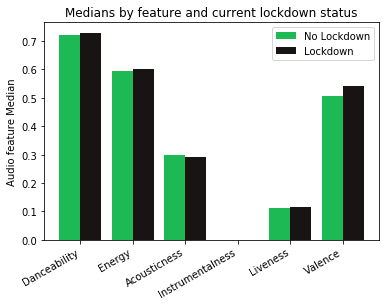

In [51]:
hist_comparing_features("Portugal")

#### Calculating Slope of Regression with Real Audio Values and Presence of Lockdown


In [52]:
calc_slope_of_regression("Portugal")

Portugal
Danceability
Lockdown Slope of Regression: 0.010761538461538456

Energy
Lockdown Slope of Regression: 0.011291076923076918

Acousticness
Lockdown Slope of Regression: -0.004895344230769228

Instrumentalness
Lockdown Slope of Regression: -0.0005011941134615331

Liveness
Lockdown Slope of Regression: 0.009172019230769225

Valence
Lockdown Slope of Regression: 0.031877576923076904



The above slope of regression values suggest that there is a positive correlation between the presence of a lockdown and a higher value for  `Danceability`, `Energy`, `Liveness`, and `Valence` in songs. On the other hand, there appears to be a negative correlation between the presence of a lockdown and a higher value for `Acousticness` and `Instrumentalness`.

#### Specific Slope Comparisons

**Danceability:** Regression coefficient is 0.0103 smaller in Portugal compared with complete data set. This indicates a weaker positive correlation between danceability and presence of lockdown compared with other countries. 

**Energy:** Regression coefficient is 0.016 smaller in Portugal compared with complete data set. This indicates a weaker positive correlation between energy and presence of lockdown compared with other countries. 

**Acousticness:** Regression coefficient is 0.0349 larger in Portugal compared with complete data set. This indicates a weaker negative correlation between acousticness and presence of lockdown compared with other countries. 

**Instrumentalness:** Regression coefficient is 0.000739 larger in Portugal compared with complete data set. This indicates a weaker negative correlation between instrumentalness and presence of lockdown compared with other countries. 

**Liveness:** Regression coefficient is 0.0033 larger in Portugal compared with complete data set. This indicates a stronger positive correlation between energy and presence of lockdown compared with other countries. 

**Valence:** Regression coefficient is 0.000016 larger in Portugal compared with complete data set. This indicates a stronger positive correlation between valence and presence of lockdown compared with other countries. 

#### Histograms of Slope Regression Values with Presence of Lockdown and Permuted Values of Audio Feature


Danceability
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Danceability


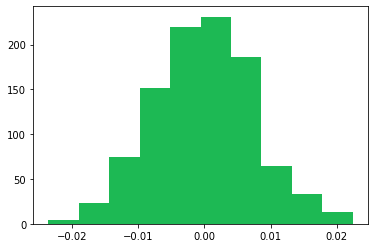

Energy
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Energy


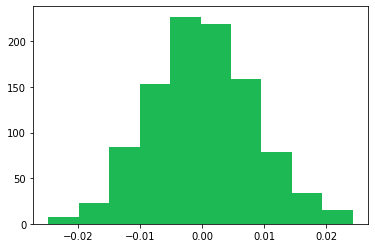

Acousticness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Acousticness


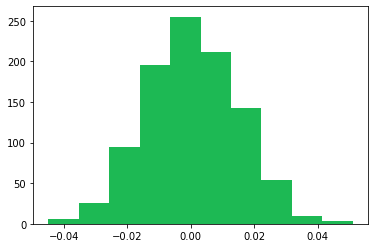

Instrumentalness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Instrumentalness


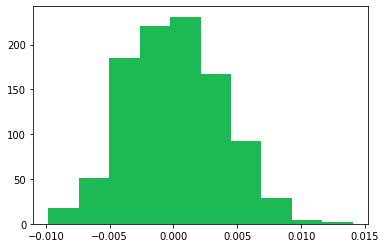

Liveness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Liveness


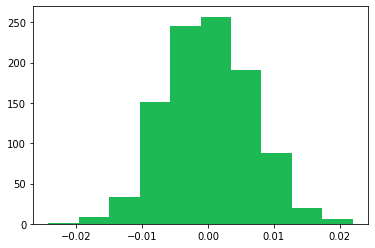

Valence
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Valence


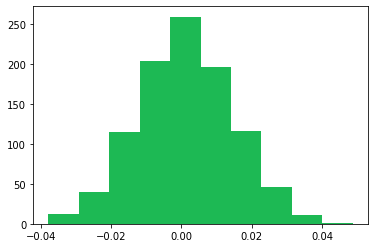

In [53]:
compare_to_permuted("Portugal")

**Danceability:** The slope of regression with real values of danceability is 0.0108. This value appears to the right of the peak of the histogram. The considerable number of observations suggests that the actual regression slope could have very likely been a result of random chance and there is **no real positive correlation** between danceability and presence of a lockdown. 

**Energy:** The slope of regression with real values of energy is 0.0113. This value appears to the right of the peak of the histogram. The considerable number of observations suggests that the actual regression slope could have very likely been a result of random chance and there is **no real positive correlation** between energy and presence of a lockdown. 

**Acousticness:** The slope of regression with real values of acousticness is -0.00490. This value near the peak of the histogram with a significant number of observations of this slope. This suggests that the actual regression slope could have very likely been a result of random chance and there is **no real negative correlation** between acousticness and presence of a lockdown. 

**Instrumentalness:** The slope of regression with real values of instrumentalness is -0.0005. This value appears well within the histogram with a significant number of observations of this slope. The actual regression slope could have very likely been a result of random chance and there is **no real negative correlation** between instrumentalness and presence of a lockdown.  

**Liveness:** The slope of regression with real values of liveness is 0.0092. This value appears well within the histogram. Thus, the actual regression slope could have very likely been a result of random chance and there is **no real positive correlation** between liveness and presence of a lockdown.

**Valence:** The slope of regression with real values of valence is 0.032. This value lies in the extremes of the histogram with very few observations with this slope value. Therefore, the actual regression slope is likely not a result of random chance and there is **a real positive correlation** between valence and presence of a lockdown.

*note: in cases where actual regression slope lies on histogram but does not have many observed cases, further investigation is needed to come to a definitive answer*

#### Portugal Listener's Favorite Song Since Start of Pandemic 

In [54]:
country_anthem("Portugal")

Track Name                                            Blinding Lights
Artist                                                     The Weeknd
Streams                                                        332614
URL                 https://open.spotify.com/track/0VjIjW4GlUZAMYd...
Week Start                                                    3/20/20
Week End                                                      3/27/20
Region                                                       Portugal
URI                                            0VjIjW4GlUZAMYd2vXMi3b
Danceability                                                    0.514
Energy                                                           0.73
Loudness                                                       -5.934
Acousticness                                                  0.00146
Instrumentalness                                             9.54e-05
Liveness                                                       0.0897
Valence             

### Portugal Recap

Listeners in Portugal showed a notable preference for happier music during lockdown periods (significant valence regression coefficient of 0.032). 

In general, Portugal listeners seem to prefer songs with greater liveness and valence than other countries in the data set. 

Since the pandemic began, the most listened to song in Portugal is Blinding Lights by The Weeknd. 

[Listen Here](https://open.spotify.com/track/0VjIjW4GlUZAMYd2vXMi3b)

## Vietnam

#### Audio Feature Averages


In [55]:
lockdown_status_avg("Vietnam")

Vietnam
Danceability
No Lockdown Mean: 0.6761676923076938
Yes Lockdown Mean: 0.6788874999999996
No Lockdown Median: 0.695
Yes Lockdown Median: 0.701


Energy
No Lockdown Mean: 0.5734584615384615
Yes Lockdown Mean: 0.5741099999999999
No Lockdown Median: 0.593
Yes Lockdown Median: 0.601


Acousticness
No Lockdown Mean: 0.3892062230769229
Yes Lockdown Mean: 0.36808542499999963
No Lockdown Median: 0.32
Yes Lockdown Median: 0.292


Instrumentalness
No Lockdown Mean: 0.011232603561538459
Yes Lockdown Mean: 0.005464943900000004
No Lockdown Median: 0.0
Yes Lockdown Median: 0.0


Liveness
No Lockdown Mean: 0.15772338461538435
Yes Lockdown Mean: 0.16439949999999995
No Lockdown Median: 0.112
Yes Lockdown Median: 0.122


Valence
No Lockdown Mean: 0.47695523076923185
Yes Lockdown Mean: 0.4856824999999997
No Lockdown Median: 0.47
Yes Lockdown Median: 0.483




**Danceability** median increased by 0.006 during lockdown periods. Compared with the complete dataset of countries, on average, Vietnam listened to music with lower danceability levels during regular periods (0.012 lower) and lower levels during lockdown periods (0.03 lower). 

**Energy** median increased by 0.008 during lockdown periods. Compared with the complete dataset of countries, on average, Vietnam listened to music with lower energy levels during regular periods (0.033 lower) and lower levels during lockdown periods (0.052 lower). 

**Acousticness** median decreased by 0.028 during lockdown periods. Compared with the complete dataset of countries, on average, Vietnam listened to music with higher acousticness levels during regular periods (0.112 higher) and higher levels during lockdown periods (0.1185 higher). 

**Instrumentalness** mean decreased by 0.00577 during lockdown periods. Compared with the complete dataset of countries, on average, Vietnam listened to music with slightly higher levels of instrumentalness during regular periods (0.00104 higher) and lower levels during lockdown periods (0.0035 lower). 

**Liveness** median increased by 0.010 during lockdown periods. Compared with the complete dataset of countries, on average, Vietnam listened to music with the same liveness levels during regular periods (both 0.112) and slightly higher liveness levels during lockdown periods (0.008 higher).  

**Valence** median increased by 0.013 during lockdown periods. Compared with the complete dataset of countries, on average, Vietnam listened to music with lower valence levels during regular periods (0.028 lower) and lower levels during lockdown periods (0.057 lower).

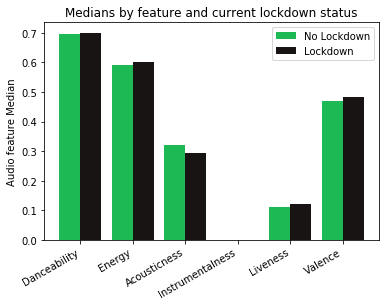

In [57]:
hist_comparing_features("Vietnam")

#### Calculating Slope of Regression with Real Audio Values and Presence of Lockdown


In [58]:
calc_slope_of_regression("Vietnam")

Vietnam
Danceability
Lockdown Slope of Regression: 0.002719807692307691

Energy
Lockdown Slope of Regression: 0.0006515384615384579

Acousticness
Lockdown Slope of Regression: -0.021120798076923068

Instrumentalness
Lockdown Slope of Regression: -0.005767659661538447

Liveness
Lockdown Slope of Regression: 0.00667611538461538

Valence
Lockdown Slope of Regression: 0.008727269230769231



The above slope of regression values suggest that there is a positive correlation between the presence of a lockdown and a higher value for  `Danceability`, `Energy`, `Liveness`, and `Valence` in songs. On the other hand, there appears to be a negative correlation between the presence of a lockdown and a higher value for `Acousticness` and `Instrumentalness`.

#### Specific Slope Comparisons

**Danceability:** Regression coefficient is 0.0184 smaller in Vietnam compared with complete data set. This indicates a weaker positive correlation between danceability and presence of lockdown compared with other countries. 

**Energy:** Regression coefficient is 0.026 smaller in Vietnam compared with complete data set. This indicates a weaker positive correlation between energy and presence of lockdown compared with other countries. 

**Acousticness:** Regression coefficient is 0.0186 larger in Vietnam compared with complete data set. This indicates a weaker negative correlation between acousticness and presence of lockdown compared with other countries. 

**Instrumentalness:** Regression coefficient is 0.0045 smaller in Vietnam compared with complete data set. This indicates a stronger negative correlation between instrumentalness and presence of lockdown compared with other countries. 

**Liveness:** Regression coefficient is 0.00078 larger in Vietnam compared with complete data set. This indicates a stronger positive correlation between energy and presence of lockdown compared with other countries. 

**Valence:** Regression coefficient is 0.023 smaller in Portugal compared with complete data set. This indicates a waeker positive correlation between valence and presence of lockdown compared with other countries. 

#### Histograms of Slope Regression Values with Presence of Lockdown and Permuted Values of Audio Feature


Danceability
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Danceability


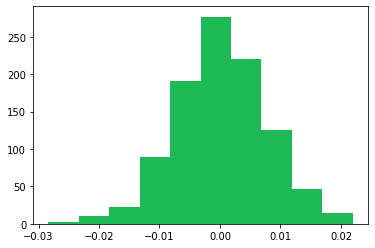

Energy
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Energy


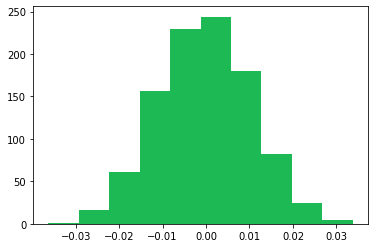

Acousticness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Acousticness


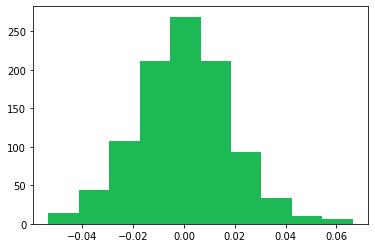

Instrumentalness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Instrumentalness


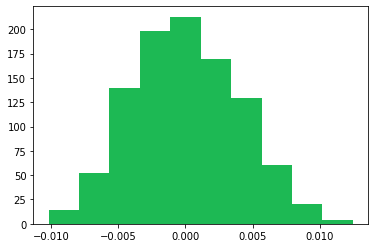

Liveness
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Liveness


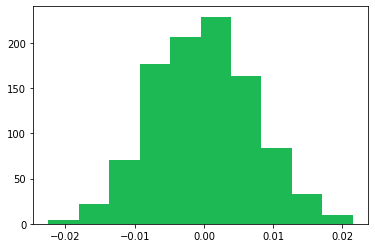

Valence
Histogram of Slope of Regression Value of Presence of a Lockdown with Permuted Values of  Valence


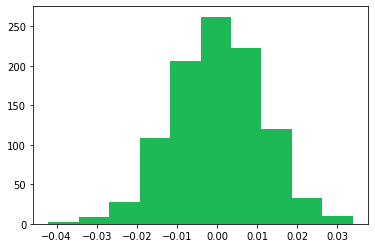

In [60]:
compare_to_permuted("Vietnam")

**Danceability:** The slope of regression with real values of danceability is 0.0027. This value near the peak of the histogram. The considerable number of observations suggests that the actual regression slope could have very likely been a result of random chance and there is **no real positive correlation** between danceability and presence of a lockdown. 

**Energy:** The slope of regression with real values of energy is 0.00065. This value appears near the peak of the histogram. The considerable number of observations suggests that the actual regression slope could have very likely been a result of random chance and there is **no real positive correlation** between energy and presence of a lockdown. 

**Acousticness:** The slope of regression with real values of acousticness is -0.0211. This value is to the left of the peak of the histogram with a significant number of observations of this slope. This suggests that the actual regression slope could have very likely been a result of random chance and there is **no real negative correlation** between acousticness and presence of a lockdown. 

**Instrumentalness:** The slope of regression with real values of instrumentalness is -0.0058. This value appears near the extremes within the histogram with a considerable number of observations of this slope. The actual regression slope could have very likely been a result of random chance and there is **likely no real negative correlation** between instrumentalness and presence of a lockdown.

**Liveness:** The slope of regression with real values of liveness is 0.00668. This value appears well within the histogram, near its peak. Thus, the actual regression slope could have very likely been a result of random chance and there is **no real positive correlation** between liveness and presence of a lockdown.

**Valence:** The slope of regression with real values of valence is 0.00873. This value near the peak of the histogram with a significant number of observations of this slope. Therefore, the actual regression slope is likely  a result of random chance and there is **no real positive correlation** between valence and presence of a lockdown.

*note: in cases where actual regression slope lies on histogram but does not have many observed cases, further investigation is needed to come to a definitive answer*

#### Explanation of Correlations
Overall, there were no real significant correlations in Vietnam between the presence of a lockdown and song attributes. We suggest that this can be attributed to the overall minimal impact of coronavirus on the country (as of 5/17/20, Vietnam has no recorded coronavirus-related deaths). Therefore, coronavirus lockdowns did not seem to significantly affect song tastes in Vietnam.

#### Vietnam Listener's Favorite Song Since Start of Pandemic 

In [62]:
country_anthem("Vietnam")

Track Name                                                 Black Swan
Artist                                                            BTS
Streams                                                        347566
URL                 https://open.spotify.com/track/24NuEDgyRIljwSy...
Week Start                                                    1/17/20
Week End                                                      1/24/20
Region                                                        Vietnam
URI                                            24NuEDgyRIljwSyY0lsr7b
Danceability                                                    0.719
Energy                                                          0.758
Loudness                                                       -5.167
Acousticness                                                    0.137
Instrumentalness                                                    0
Liveness                                                        0.129
Valence             

### Vietnam Recap

Listeners in Vietnam did not show considerable changes in their song preferences during regular periods and periods of lockdown. This may be because the country's overall low infection numbers led to little impact on overall daily life in Vietnam.

In general, Vietnam listeners seem to prefer songs with greater acousticness than other countries in the data set. 

Since the pandemic began, the most listened to song in Vietnam is Black Swan by BTS. 

[Listen Here](https://open.spotify.com/track/24NuEDgyRIljwSyY0lsr7b)

## Taiwan

#### Audio Feature Averages


In [63]:
lockdown_status_avg("Taiwan")

Taiwan
Danceability
No Lockdown Mean: 0.6195935294117669
Yes Lockdown Mean: nan
No Lockdown Median: 0.632
Yes Lockdown Median: nan


Energy
No Lockdown Mean: 0.5687670588235303
Yes Lockdown Mean: nan
No Lockdown Median: 0.568
Yes Lockdown Median: nan


Acousticness
No Lockdown Mean: 0.3534988529411759
Yes Lockdown Mean: nan
No Lockdown Median: 0.275
Yes Lockdown Median: nan


Instrumentalness
No Lockdown Mean: 0.00898375754117646
Yes Lockdown Mean: nan
No Lockdown Median: 0.0
Yes Lockdown Median: nan


Liveness
No Lockdown Mean: 0.14842735294117673
Yes Lockdown Mean: nan
No Lockdown Median: 0.109
Yes Lockdown Median: nan


Valence
No Lockdown Mean: 0.4388259999999994
Yes Lockdown Mean: nan
No Lockdown Median: 0.425
Yes Lockdown Median: nan




Because Taiwan did not impose any lockdown orders, analysis of median and comparison with the complete dataset of other countries will only be completed from data collected from Taiwan's regular (no lockdown) periods.

**Danceability:** Compared with the complete dataset of countries, on average, Taiwan listened to music with lower danceability levels during regular periods (0.0752 lower).

**Energy:** Compared with the complete dataset of countries, on average, Taiwan listened to music with lower energy levels during regular periods (0.058 lower).

**Acousticness:** Compared with the complete dataset of countries, on average, Taiwan listened to music with higher acousticness levels during regular periods (0.067 higher).

**Instrumentalness:** Compared with the complete dataset of countries, on average, Taiwan listened to music with lower instrumentalness levels during regular periods (0.00121 lower).

**Liveness:** Compared with the complete dataset of countries, on average, Taiwan listened to music with lower liveness levels during regular periods (0.003 lower).

**Valence:** Compared with the complete dataset of countries, on average, Taiwan listened to music with lower valence levels during regular periods (0.073 lower).

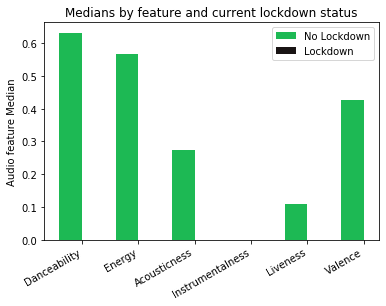

In [64]:
hist_comparing_features("Taiwan")

As stated earlier, the above histogram only has data values for No Lockdown periods. Additionally, we are unable to calculate the slope of regression values for Taiwan due to no presence of a lockdown.

#### Taiwan Listener's Favorite Song Since Start of Pandemic 

In [65]:
country_anthem("Taiwan")

Track Name          æƒ³è¦‹ä½ æƒ³è¦‹ä½ æƒ³è¦‹ä½ (é›»è¦–åŠ‡"æƒ³è¦‹ä½...
Artist                                                            831
Streams                                                        349192
URL                 https://open.spotify.com/track/69zgyr5HVKdInje...
Week Start                                                    2/21/20
Week End                                                      2/28/20
Region                                                         Taiwan
URI                                            69zgyr5HVKdInjeKpq1qHa
Danceability                                                    0.547
Energy                                                          0.666
Loudness                                                       -5.694
Acousticness                                                      0.4
Instrumentalness                                                    0
Liveness                                                        0.144
Valence             

### Taiwan Recap

Taiwan was included in our analysis as a look into song tastes in a country not greatly affected by the coronavirus pandemic. There was no lockdown order placed in Taiwan, and the country has had only 7 coronavirus related deaths.

In general, Taiwan listeners seem to prefer songs with greater acousticness than other countries in the data set. 

Since the pandemic began, the most listened to song in Taiwan is 想見你想見你想見你 by 831. (Direct Translation: I Want to See You , English Title: Miss You 300)

[Listen Here](https://open.spotify.com/track/69zgyr5HVKdInjeKpq1qHa)

## Possible Next Questions
- Our data analysis indicates that for all countries, there appears to be a real positive correlation between the presence of a lockdown and values for danceability, energy, and valence. There also appears to be a real negative correlation between the presence of a lockdown and values for acousticness. However, while these correlation values do not appear to be due to random chance, there are all relatively small in magnitude so further research may be necessary to determine the significance of this correlation.
- As stated above, it appears to be ambigious if certain slope of regression values are due to random chance or real correlation. Therefore, further research may be necessary.
- Other phenomena that come as a result of the lockdowns may affect the songs that users are listening to around the world. For example, lockdowns may lead to increased time spent on other forms of media (ie Instagram, YouTube, Netflix) which may influence music taste. For instance, we noticed that the top songs in the US consistently were songs popular on the app TikTok. Therefore, it may be difficult to determine if trends in song features are strictly due to the presence of a lockdown or due to other cultural phenomena, such as overall more time spent on apps like TikTok.
- Music tastes depend also on new music being released by artists. Due to lockdowns, artists may be unable to release new music leading to stagnant trends in music tastes.
- Music tastes may depend on seasons/times of the year. Perhaps the correlations we observed are characteristic of the yearly transition from winter into spring. We may further explore this possibility by comparing our observed correlations with similar time frames in previous years.

# Conclusion

Over the course of data analysis, we discovered that at a high-level, there appears to be a positive correlation between the presence of a lockdown and higher values for danceability, energy, and valence. There also appears to be a negative correlation between the presence of a lockdown and values for acousticness. These correlations were determined by our analysis of the complete dataset of all countries. However, when we decided to move into more specific analysis of individual countries, many of these correlations seemed to no longer hold. This may be because our high-level analysis of all countries had nearly an order of magnitude more data points than the analysis for any individual country. These additional data points may have made it easier to determine these correlations.

In our individual country analysis, some interesting correlations did arise. For example, in the United States, the United Kingdom, and Portugal, there appears to be a positive correlation between the presence of a lockdown and higher values for valence. This may suggest that listeners in these countries have listened to more happy music to cope with these times. In Italy, Spain, and possibly the United States, there appears to be a positive correlation between energy values in songs and the presence of a lockdown. Perhaps listeners in these regions are coping through listening to higher energy songs. On the other hand, countries such as Vietnam and Switzerland appear to have no real correlation between the presence of a lockdown and any song attributes. This may be due to the fact that lockdown measures and the overall toll of coronavirus were lighter in these countries than other harder-hit regions.

Overall, while our conclusions do offer some insight into song trends during these unprecedented times, additional research is definitely necessary to determine if our correlations are truly due to the impact of coronavirus, or are rather reflective of other cultural processes.

However, our research does give insight to the power of music. Specifically, in our high-level analysis, it was interesting to note how music globally was being used as a coping mechanism during these times. It reminds us of the fact that all individuals are struggling and adjusting in their own ways during this time, and that we are united in our struggles. Our research can be applied to real-life because it may encourage artists to continue to create music that we can connect with and use to help us get through hardship. 

From this point, while we believe our research was a good initial step in the right direction, we know that much more is necessary to determine real patterns and trends. For example, our research may be expanded upon in the future through analysis of additional countries, and over a longer period of time. In this way, the larger sample size of songs may help in identifying real correlations. Overall, our research provided interesting insight to the power of music in uniting us, helping us heal, and giving us hope.

# Source Code

https://github.coecis.cornell.edu/esj25/2950-final-project

# Acknowledgements

Thank you to:
- Spotify(Web API and Spotify Charts) 
- [Matplotlib Documentation](https://matplotlib.org/)
- Stack Overflow
- and our mentor Nancy Engel!  